In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
Company = pd.read_excel('Company_Data2015.xlsx')

In [3]:
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [4]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [5]:
Company.rename(columns={'Current_Ratio[Latest]':'Current_Ratio', 'Fixed_Assets_Ratio[Latest]':'Fixed_Assets_Ratio',
       'Inventory_Ratio[Latest]':'Inventory_Ratio', 'Debtors_Ratio[Latest]':'Debtors_Ratio',
       'Total_Asset_Turnover_Ratio[Latest]':'Total_Asset_Turnover_Ratio', 'Interest_Cover_Ratio[Latest]':'Interest_Cover_Ratio',
       'PBIDTM_perc[Latest]':'PBIDTM_perc', 'PBITM_perc[Latest]':'PBITM_perc', 'PBDTM_perc[Latest]':'PBDTM_perc',
       'CPM_perc[Latest]':'CPM_perc', 'APATM_perc[Latest]':'APATM_perc','Book_Value_Adj._Unit_Curr':'Book_Value_Adj_Unit_Curr'},inplace=True)

In [6]:
Company.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_',
       'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG-Net_Worth_perc',
       'ROG-Capital_Employed_perc', 'ROG-Gross_Block_perc',
       'ROG-Gross_Sales_perc', 'ROG-Net_Sales_perc',
       'ROG-Cost_of_Production_perc', 'ROG-Total_Assets_perc',
 

In [7]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])


The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [8]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [9]:
Company.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,NaN,NaN,NaN,16065.388734,19776.817379,4.0,3029.25,6077.5,24269.5,72493.0
Co_Name,3586,3586,Meenakshi Enter.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Networth_Next_Year,3586.0,NaN,NaN,NaN,725.045251,4769.681004,-8021.6,3.985,19.015,123.8025,111729.1
Equity_Paid_Up,3586.0,NaN,NaN,NaN,62.966584,778.761744,0.0,3.75,8.29,19.5175,42263.46
Networth,3586.0,NaN,NaN,NaN,649.746299,4091.988792,-7027.48,3.8925,18.58,117.2975,81657.35
...,...,...,...,...,...,...,...,...,...,...,...
Debtors_Velocity_Days,3586.0,NaN,NaN,NaN,603.894032,10636.75958,0.0,8.0,49.0,106.0,514721.0
Creditors_Velocity_Days,3586.0,NaN,NaN,NaN,2057.854992,54169.479197,0.0,8.0,39.0,89.0,2034145.0
Inventory_Velocity_Days,3483.0,NaN,NaN,NaN,79.644559,137.847792,-199.0,0.0,35.0,96.0,996.0
Value_of_Output_to_Total_Assets,3586.0,NaN,NaN,NaN,0.819757,1.2014,-0.33,0.07,0.48,1.16,17.63


In [10]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,...,PBIDTM_perc,PBITM_perc,PBDTM_perc,CPM_perc,APATM_perc,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,24269.50,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,65.65,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,72493.00,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


In [11]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)


In [12]:
Company[['Co_Name','default','Networth_Next_Year']].head(10)

,Co_Name,default,Networth_Next_Year
0,Hind.Cables,1,-8021.60
1,Tata Tele. Mah.,1,-3986.19
2,ABG Shipyard,1,-3192.58
3,GTL,1,-3054.51
4,Bharati Defence,1,-2967.36
5,Usha Ispat,1,-2519.40
6,Hanung Toys,1,-2125.05
7,K S Oils,1,-2100.56
8,Quadrant Tele.,1,-1695.75
9,ITI,1,-1677.18


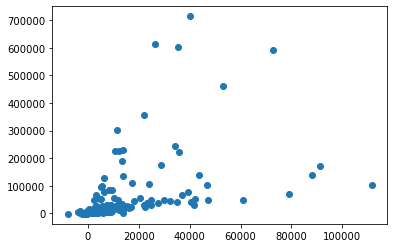

In [13]:
plt.scatter(Company.Networth_Next_Year,Company['Capital_Employed'])

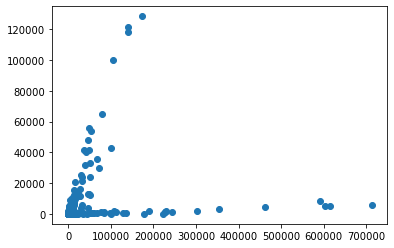

In [14]:
plt.scatter(x=Company.Capital_Employed,y=Company['Gross_Block_'])

In [15]:
Company['default'].value_counts()


0    3198
1     388
Name: default, dtype: int64

In [16]:
Company['default'].value_counts(normalize = True)


0   0.89
1   0.11
Name: default, dtype: float64

In [17]:
Company.isnull().sum().sum()

118

In [18]:
Company.size

243848

In [19]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [20]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [21]:
((Company_X > UL) | (Company_X < LL)).sum()

APATM_perc                         933
Adjusted_PAT                       954
Book_Value_Adj_Unit_Curr           486
Book_Value_Unit_Curr               485
CEPS_annualised_Unit_Curr          602
                                  ... 
Total_Assets_to_Liabilities_       574
Total_Debt                         583
Value_Of_Output                    559
Value_of_Output_to_Gross_Block     481
Value_of_Output_to_Total_Assets    150
Length: 67, dtype: int64

In [22]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [23]:
Company_X.isnull().sum().sum()

42440

In [24]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

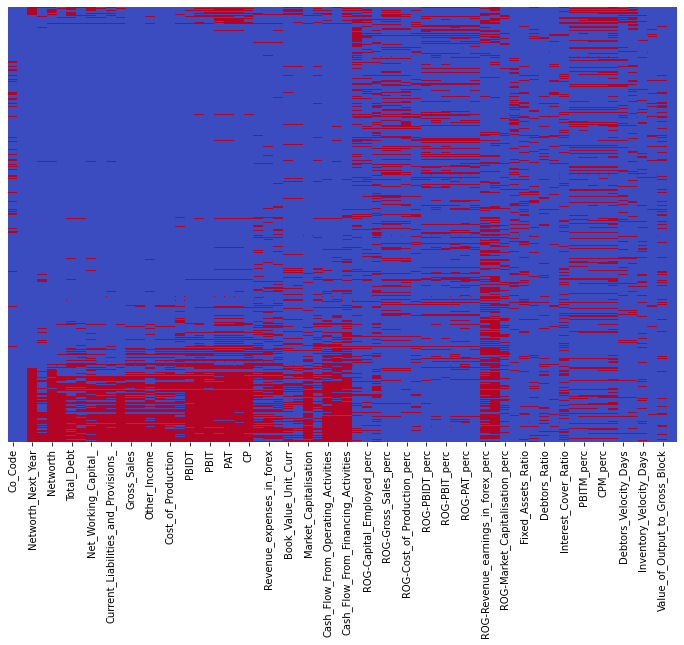

In [25]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [26]:
Company_sub1.isnull().sum(axis = 1)


0       20
1       35
2       44
3       37
4       36
        ..
3581    31
3582    37
3583    35
3584    31
3585    37
Length: 3586, dtype: int64

In [27]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]


In [28]:
Company_sub1_temp.shape


(1177, 68)

In [29]:
Company_sub1_temp['default'].value_counts()


0    1059
1     118
Name: default, dtype: int64

In [30]:
118/388

0.30412371134020616

In [31]:
118/1059

0.11142587346553352

While we came down to 1177 rows from 3586 rows provided originally, we lose a larger proportion of actual defaulters 388 in the original data vs. only 188 in the subset, threfore, end up losing more than 70% of the actual defaulters.

In [32]:
Company_sub1['default'].value_counts()


0    3198
1     388
Name: default, dtype: int64

In [33]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size


ROG-Revenue_expenses_in_forex_perc    0.45
ROG-Revenue_earnings_in_forex_perc    0.37
Cash_Flow_From_Financing_Activities   0.28
PAT                                   0.27
Adjusted_PAT                          0.27
                                      ... 
Co_Code                               0.08
Total_Asset_Turnover_Ratio            0.06
Value_of_Output_to_Total_Assets       0.04
Co_Name                               0.00
default                               0.00
Length: 68, dtype: float64

Dropping columns with more than 20% missing values


In [34]:
Company_sub2 = Company_sub1.drop(['ROG-Revenue_expenses_in_forex_perc','ROG-Revenue_earnings_in_forex_perc','Cash_Flow_From_Financing_Activities','Adjusted_PAT','PAT'],
                           axis = 1)

In [35]:
Company_sub2.isnull().sum().sort_values(ascending = False)/Company_sub2.index.size

PBT                                   0.26
APATM_perc                            0.26
Cash_Flow_From_Investing_Activities   0.24
ROG-Gross_Block_perc                  0.23
CP                                    0.23
                                      ... 
Co_Code                               0.08
Total_Asset_Turnover_Ratio            0.06
Value_of_Output_to_Total_Assets       0.04
Co_Name                               0.00
default                               0.00
Length: 63, dtype: float64

In [36]:
Company_sub3 = Company_sub2.drop(['PBT','APATM_perc','Cash_Flow_From_Investing_Activities','ROG-Gross_Block_perc','CP'],
                           axis = 1)

In [37]:
Company_sub3.isnull().sum().sort_values(ascending = False)/Company_sub3.index.size

PBDT                                  0.23
Cash_Flow_From_Operating_Activities   0.22
ROG-Net_Worth_perc                    0.21
Revenue_earnings_in_forex             0.21
Interest_Cover_Ratio                  0.20
CPM_perc                              0.20
PBIT                                  0.20
PBITM_perc                            0.20
PBDTM_perc                            0.19
Capital_expenses_in_forex             0.19
Revenue_expenses_in_forex             0.19
Networth_Next_Year                    0.19
ROG-Cost_of_Production_perc           0.19
PBIDT                                 0.19
ROG-Gross_Sales_perc                  0.19
ROG-Net_Sales_perc                    0.19
Networth                              0.18
Market_Capitalisation                 0.18
ROG-CP_perc                           0.18
ROG-PBDT_perc                         0.18
Net_Working_Capital_                  0.17
ROG-PBIT_perc                         0.17
ROG-PBIDT_perc                        0.17
ROG-PBT_per

In [38]:
Company_sub4 = Company_sub3.drop(['PBDT','Cash_Flow_From_Operating_Activities','ROG-Net_Worth_perc','Revenue_earnings_in_forex','Revenue_expenses_in_forex','Capital_expenses_in_forex'],
                           axis = 1)

In [39]:
Company_sub4.isnull().sum().sort_values(ascending = False)/Company_sub4.index.size

Interest_Cover_Ratio                  0.20
CPM_perc                              0.20
PBIT                                  0.20
PBITM_perc                            0.20
PBDTM_perc                            0.19
Networth_Next_Year                    0.19
ROG-Cost_of_Production_perc           0.19
PBIDT                                 0.19
ROG-Gross_Sales_perc                  0.19
ROG-Net_Sales_perc                    0.19
Networth                              0.18
Market_Capitalisation                 0.18
ROG-CP_perc                           0.18
ROG-PBDT_perc                         0.18
Net_Working_Capital_                  0.17
ROG-PBIT_perc                         0.17
ROG-PBIDT_perc                        0.17
ROG-PBT_perc                          0.17
Selling_Cost                          0.17
Other_Income                          0.17
CEPS_annualised_Unit_Curr             0.17
ROG-PAT_perc                          0.17
Capital_Employed                      0.17
PBIDTM_perc

In [40]:
predictors = Company_sub4.drop(['default','Co_Code','Co_Name'], axis = 1)
response = Company_sub4['default']

In [41]:
predictors

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,...,Interest_Cover_Ratio,PBIDTM_perc,PBITM_perc,PBDTM_perc,CPM_perc,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.50,NaN,109.60,...,-0.20,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.84,-10.30,NaN,NaN,NaN,29.00,101.00,2.00,0.31,0.24
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.21,NaN,NaN,NaN,NaN,97.00,NaN,0.00,-0.03,-0.26
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.16,-3.33,-7.21,NaN,NaN,93.00,63.00,2.00,0.24,1.90
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.73,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.60,7.76
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.18,39.92,32.17,29.81,NaN,13.00,53.00,77.00,0.29,1.00
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.60,8.09,6.69,7.31,5.69,7.00,30.00,48.00,1.42,3.24
3584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.35,28.12,20.55,23.39,19.55,32.00,69.00,42.00,0.36,0.68


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [43]:
Company_sub5 = pd.concat([scaled_predictors, response], axis = 1)


In [44]:
from sklearn.impute import KNNImputer #MICE FancyImpute

In [45]:
imputer = KNNImputer(n_neighbors=15)

In [46]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub5), columns = Company_sub5.columns)

In [47]:
Company_imputed.isnull().sum().sum()

0

<AxesSubplot:>

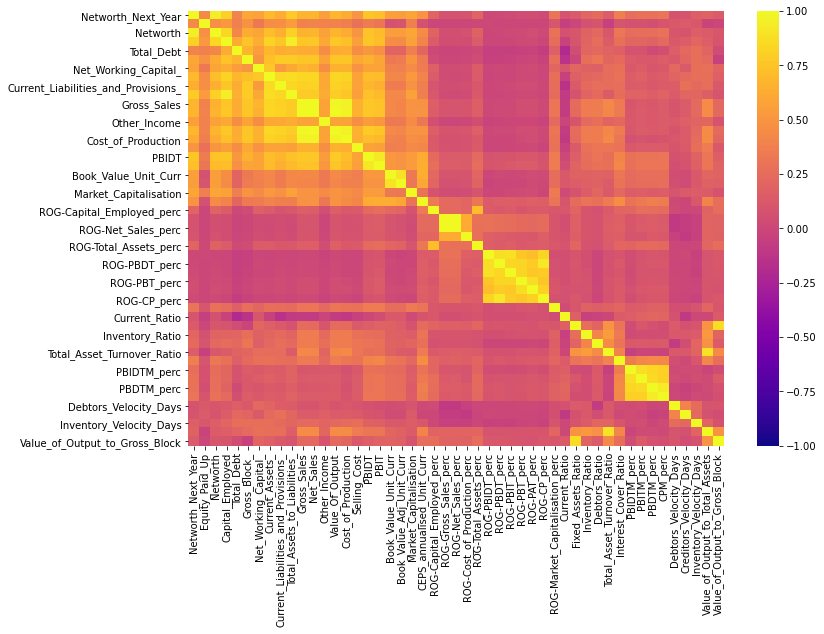

In [48]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [49]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42)


In [51]:
X_train.shape

(2402, 49)

In [52]:
X_test.shape

(1184, 49)

In [53]:
y_train.shape

(2402,)

In [54]:
y_test.shape

(1184,)

In [55]:
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

In [56]:
import statsmodels.formula.api as SM

In [57]:
Default_train.columns = Company_imputed.columns.str.replace('-', '_')

In [58]:
Default_test.columns = Company_imputed.columns.str.replace('-', '_')

In [59]:
Default_train.columns

Index(['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBIT',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Sales_perc',
       'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc',
       'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc',
       'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc', 'ROG_CP_perc',
       'ROG_Market_Capitalisation_perc', 'Current_Ratio', 'Fixed_Assets_Ratio',
       'Inventory_Ratio', 'Debtors_Ratio', 'Total_Asset_Turnover_Ratio',
       'Interest_Cover_Ratio', 'PBIDTM_perc', 'PBITM_perc', 'PBDTM_perc',
       'CPM_perc', 'Debtor

In [60]:
f_1= 'default ~ Networth_Next_Year + Equity_Paid_Up + Networth + Capital_Employed + Total_Debt + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Gross_Sales_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBITM_perc + PBDTM_perc + CPM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block' 

In [61]:
model_1=SM.logit(formula=f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114909
         Iterations 11


In [62]:
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2352
Method:                           MLE   Df Model:                           49
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6512
Time:                        20:08:40   Log-Likelihood:                -276.01
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                7.053e-184
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3289      0.410    -15.429      0.000      -7.133      -5.525
Networth_Next_Year                     -4.0123      0.562     -7.143      0.000      -5.113      -2.911
Equity_Paid_Up                          0.0054      0.178      0.030      0.976      -0.343       0.354
Networth                                0.0936      0.374      0.250      0.802      -0.640       0.827
Capital_Employed                       -0.5397      0.396     -1.361      0.173      -1.317       0.237
Total_Debt                              0.0149      0.281      0.053      0.958      -0.535       0.565
Gross_Block_                            1.0510      0.299      3.519      0.000       0.466       1.636
Net_Working_Capital_                   -0.2100      0.363     -0.578      0.563      -0.922       0.502
Current_Assets_                         0.3398      0.480      0.709      0.479      -0.600       1.280
Current_Liabilities_and_Provisions_     0.8616      0.365      2.359      0.018       0.146       1.577
Total_Assets_to_Liabilities_            0.6293      0.421      1.496      0.135      -0.195       1.454
Gross_Sales                            -5.7767      3.224     -1.792      0.073     -12.095       0.542
Net_Sales                               8.0663      3.436      2.348      0.019       1.332      14.800
Other_Income                            0.2967      0.166      1.790      0.073      -0.028       0.621
Value_Of_Output                        -4.3751      1.693     -2.584      0.010      -7.693      -1.057
Cost_of_Production                      1.6222      0.692      2.344      0.019       0.266       2.978
Selling_Cost                            0.1979      0.221      0.896      0.370      -0.235       0.631
PBIDT                                  -1.6929      0.353     -4.793      0.000      -2.385      -1.001
PBIT                                    1.2282      0.326      3.765      0.000       0.589       1.868
Book_Value_Unit_Curr                   -2.4022      1.182     -2.033      0.042      -4.718      -0.086
Book_Value_Adj_Unit_Curr               -1.5516      1.048     -1.480      0.139      -3.606       0.503
Market_Capitalisation                   0.0814      0.219      0.372      0.710      -0.347       0.510
CEPS_annualised_Unit_Curr               0.2904      0.281      1.035      0.301      -0.260       0.841
ROG_Capital_Employed_perc               0.4719      0.156      3.019      0.003       0.166       0.778
ROG_Gross_Sales_perc                   -0.5759      1.402     -0.411      0.681      -3.324       2.172
ROG_Net_Sales_perc                      0.5013      1.419      0.353      0.724      -2.280       3.283
ROG_Cost_of_Production_perc            -0.1577      0.155     -1.019      0.308      -0.461       0.146
ROG_Total_Assets_perc                  -0.2341      0.158     -1.483      0.138      -0.544       0.075
ROG_PBIDT_perc   

In [63]:
f_1= 'default ~ Networth_Next_Year + Equity_Paid_Up + Networth + Capital_Employed + Total_Debt + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Gross_Sales_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + CPM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block' 

model_2=SM.logit(formula=f_1, data=Default_train).fit()

model_2.summary()


Optimization terminated successfully.
         Current function value: 0.114909
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2353
Method:                           MLE   Df Model:                           48
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6512
Time:                        20:08:40   Log-Likelihood:                -276.01
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.513e-184
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3288      0.410    -15.433      0.000      -7.133      -5.525
Networth_Next_Year                     -4.0124      0.562     -7.144      0.000      -5.113      -2.912
Equity_Paid_Up                          0.0053      0.177      0.030      0.976      -0.342       0.353
Networth                                0.0939      0.372      0.252      0.801      -0.636       0.824
Capital_Employed                       -0.5401      0.394     -1.371      0.170      -1.312       0.232
Total_Debt                              0.0147      0.280      0.053      0.958      -0.534       0.563
Gross_Block_                            1.0510      0.299      3.519      0.000       0.466       1.636
Net_Working_Capital_                   -0.2097      0.362     -0.579      0.562      -0.919       0.500
Current_Assets_                         0.3393      0.476      0.712      0.476      -0.594       1.273
Current_Liabilities_and_Provisions_     0.8618      0.364      2.367      0.018       0.148       1.576
Total_Assets_to_Liabilities_            0.6299      0.416      1.512      0.130      -0.186       1.446
Gross_Sales                            -5.7743      3.213     -1.797      0.072     -12.071       0.522
Net_Sales                               8.0638      3.424      2.355      0.019       1.353      14.774
Other_Income                            0.2968      0.165      1.795      0.073      -0.027       0.621
Value_Of_Output                        -4.3741      1.690     -2.589      0.010      -7.686      -1.063
Cost_of_Production                      1.6215      0.687      2.360      0.018       0.275       2.968
Selling_Cost                            0.1976      0.219      0.902      0.367      -0.232       0.627
PBIDT                                  -1.6924      0.350     -4.839      0.000      -2.378      -1.007
PBIT                                    1.2278      0.323      3.804      0.000       0.595       1.860
Book_Value_Unit_Curr                   -2.4023      1.182     -2.033      0.042      -4.719      -0.086
Book_Value_Adj_Unit_Curr               -1.5516      1.048     -1.480      0.139      -3.606       0.503
Market_Capitalisation                   0.0814      0.219      0.372      0.710      -0.347       0.510
CEPS_annualised_Unit_Curr               0.2906      0.280      1.037      0.300      -0.259       0.840
ROG_Capital_Employed_perc               0.4719      0.156      3.020      0.003       0.166       0.778
ROG_Gross_Sales_perc                   -0.5777      1.388     -0.416      0.677      -3.298       2.142
ROG_Net_Sales_perc                      0.5031      1.405      0.358      0.720      -2.251       3.257
ROG_Cost_of_Production_perc            -0.1577      0.155     -1.020      0.308      -0.461       0.145
ROG_Total_Assets_perc                  -0.2343      0.157     -1.497      0.134      -0.541       0.072
ROG_PBIDT_perc   

In [64]:
f_1= 'default ~ Networth_Next_Year + Networth + Capital_Employed + Total_Debt + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Gross_Sales_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + CPM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block' 

model_3=SM.logit(formula=f_1, data=Default_train).fit()

model_3.summary()


Optimization terminated successfully.
         Current function value: 0.114909
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2354
Method:                           MLE   Df Model:                           47
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6512
Time:                        20:08:40   Log-Likelihood:                -276.01
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.211e-185
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3291      0.410    -15.438      0.000      -7.133      -5.526
Networth_Next_Year                     -4.0118      0.561     -7.148      0.000      -5.112      -2.912
Networth                                0.0960      0.366      0.262      0.793      -0.621       0.813
Capital_Employed                       -0.5390      0.392     -1.375      0.169      -1.307       0.230
Total_Debt                              0.0157      0.278      0.057      0.955      -0.528       0.560
Gross_Block_                            1.0517      0.298      3.532      0.000       0.468       1.635
Net_Working_Capital_                   -0.2084      0.360     -0.580      0.562      -0.913       0.496
Current_Assets_                         0.3375      0.473      0.714      0.475      -0.589       1.264
Current_Liabilities_and_Provisions_     0.8637      0.359      2.409      0.016       0.161       1.567
Total_Assets_to_Liabilities_            0.6299      0.417      1.512      0.131      -0.187       1.447
Gross_Sales                            -5.7828      3.200     -1.807      0.071     -12.055       0.489
Net_Sales                               8.0739      3.408      2.369      0.018       1.395      14.753
Other_Income                            0.2970      0.165      1.799      0.072      -0.027       0.621
Value_Of_Output                        -4.3793      1.682     -2.604      0.009      -7.675      -1.083
Cost_of_Production                      1.6236      0.683      2.376      0.017       0.284       2.963
Selling_Cost                            0.1974      0.219      0.902      0.367      -0.232       0.626
PBIDT                                  -1.6929      0.349     -4.845      0.000      -2.378      -1.008
PBIT                                    1.2273      0.322      3.807      0.000       0.595       1.859
Book_Value_Unit_Curr                   -2.4022      1.182     -2.033      0.042      -4.719      -0.086
Book_Value_Adj_Unit_Curr               -1.5534      1.046     -1.485      0.138      -3.604       0.497
Market_Capitalisation                   0.0819      0.218      0.375      0.707      -0.346       0.509
CEPS_annualised_Unit_Curr               0.2912      0.279      1.042      0.297      -0.256       0.839
ROG_Capital_Employed_perc               0.4717      0.156      3.022      0.003       0.166       0.778
ROG_Gross_Sales_perc                   -0.5777      1.388     -0.416      0.677      -3.299       2.144
ROG_Net_Sales_perc                      0.5033      1.406      0.358      0.720      -2.252       3.259
ROG_Cost_of_Production_perc            -0.1575      0.155     -1.019      0.308      -0.460       0.145
ROG_Total_Assets_perc                  -0.2342      0.156     -1.497      0.134      -0.541       0.072
ROG_PBIDT_perc                          0.0269      0.302      0.089      0.929      -0.564       0.618
ROG_PBDT_perc    

In [65]:
f_1= 'default ~ Networth_Next_Year + Networth + Capital_Employed + Total_Debt + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Gross_Sales_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + CPM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_4=SM.logit(formula=f_1, data=Default_train).fit()

model_4.summary()


Optimization terminated successfully.
         Current function value: 0.114910
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2355
Method:                           MLE   Df Model:                           46
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6512
Time:                        20:08:41   Log-Likelihood:                -276.01
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                6.749e-186
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3283      0.410    -15.451      0.000      -7.131      -5.526
Networth_Next_Year                     -4.0117      0.561     -7.147      0.000      -5.112      -2.912
Networth                                0.0950      0.365      0.260      0.795      -0.621       0.811
Capital_Employed                       -0.5387      0.392     -1.374      0.169      -1.307       0.230
Total_Debt                              0.0156      0.278      0.056      0.955      -0.528       0.560
Gross_Block_                            1.0508      0.297      3.535      0.000       0.468       1.634
Net_Working_Capital_                   -0.2077      0.359     -0.578      0.563      -0.912       0.496
Current_Assets_                         0.3366      0.472      0.713      0.476      -0.589       1.262
Current_Liabilities_and_Provisions_     0.8632      0.358      2.408      0.016       0.161       1.566
Total_Assets_to_Liabilities_            0.6303      0.417      1.513      0.130      -0.186       1.447
Gross_Sales                            -5.7878      3.199     -1.809      0.070     -12.058       0.482
Net_Sales                               8.0739      3.409      2.369      0.018       1.393      14.755
Other_Income                            0.2967      0.165      1.798      0.072      -0.027       0.620
Value_Of_Output                        -4.3727      1.677     -2.607      0.009      -7.660      -1.085
Cost_of_Production                      1.6231      0.683      2.375      0.018       0.284       2.963
Selling_Cost                            0.1974      0.219      0.902      0.367      -0.232       0.626
PBIDT                                  -1.6927      0.349     -4.844      0.000      -2.378      -1.008
PBIT                                    1.2273      0.322      3.807      0.000       0.596       1.859
Book_Value_Unit_Curr                   -2.4006      1.182     -2.032      0.042      -4.717      -0.085
Book_Value_Adj_Unit_Curr               -1.5533      1.046     -1.484      0.138      -3.604       0.498
Market_Capitalisation                   0.0819      0.218      0.375      0.707      -0.346       0.509
CEPS_annualised_Unit_Curr               0.2913      0.279      1.042      0.297      -0.256       0.839
ROG_Capital_Employed_perc               0.4714      0.156      3.022      0.003       0.166       0.777
ROG_Gross_Sales_perc                   -0.5797      1.388     -0.418      0.676      -3.300       2.140
ROG_Net_Sales_perc                      0.5058      1.405      0.360      0.719      -2.248       3.260
ROG_Cost_of_Production_perc            -0.1575      0.155     -1.019      0.308      -0.460       0.145
ROG_Total_Assets_perc                  -0.2339      0.156     -1.496      0.135      -0.540       0.073
ROG_PBIDT_perc                          0.0266      0.302      0.088      0.930      -0.564       0.617
ROG_PBDT_perc    

In [66]:
f_1= 'default ~ Networth_Next_Year + Networth + Capital_Employed + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Gross_Sales_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + CPM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_4=SM.logit(formula=f_1, data=Default_train).fit()

model_4.summary()


Optimization terminated successfully.
         Current function value: 0.114911
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2356
Method:                           MLE   Df Model:                           45
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6512
Time:                        20:08:41   Log-Likelihood:                -276.02
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.403e-186
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3307      0.407    -15.540      0.000      -7.129      -5.532
Networth_Next_Year                     -4.0209      0.538     -7.476      0.000      -5.075      -2.967
Networth                                0.0940      0.365      0.257      0.797      -0.622       0.810
Capital_Employed                       -0.5361      0.389     -1.378      0.168      -1.299       0.227
Gross_Block_                            1.0554      0.286      3.695      0.000       0.496       1.615
Net_Working_Capital_                   -0.1995      0.329     -0.607      0.544      -0.844       0.445
Current_Assets_                         0.3366      0.472      0.713      0.476      -0.588       1.261
Current_Liabilities_and_Provisions_     0.8653      0.356      2.428      0.015       0.167       1.564
Total_Assets_to_Liabilities_            0.6294      0.416      1.514      0.130      -0.185       1.444
Gross_Sales                            -5.7888      3.197     -1.811      0.070     -12.054       0.476
Net_Sales                               8.0690      3.405      2.370      0.018       1.395      14.743
Other_Income                            0.2980      0.163      1.824      0.068      -0.022       0.618
Value_Of_Output                        -4.3722      1.676     -2.609      0.009      -7.656      -1.088
Cost_of_Production                      1.6296      0.673      2.421      0.015       0.310       2.949
Selling_Cost                            0.1974      0.219      0.902      0.367      -0.232       0.626
PBIDT                                  -1.6908      0.348     -4.854      0.000      -2.374      -1.008
PBIT                                    1.2265      0.322      3.809      0.000       0.595       1.858
Book_Value_Unit_Curr                   -2.3990      1.181     -2.032      0.042      -4.713      -0.085
Book_Value_Adj_Unit_Curr               -1.5547      1.046     -1.487      0.137      -3.604       0.495
Market_Capitalisation                   0.0829      0.217      0.382      0.703      -0.343       0.509
CEPS_annualised_Unit_Curr               0.2884      0.275      1.050      0.294      -0.250       0.827
ROG_Capital_Employed_perc               0.4709      0.156      3.025      0.002       0.166       0.776
ROG_Gross_Sales_perc                   -0.5788      1.387     -0.417      0.677      -3.298       2.140
ROG_Net_Sales_perc                      0.5045      1.404      0.359      0.719      -2.248       3.257
ROG_Cost_of_Production_perc            -0.1571      0.154     -1.018      0.309      -0.460       0.145
ROG_Total_Assets_perc                  -0.2338      0.156     -1.495      0.135      -0.540       0.073
ROG_PBIDT_perc                          0.0277      0.301      0.092      0.927      -0.562       0.617
ROG_PBDT_perc                           0.1368      0.338      0.405      0.686      -0.526       0.799
ROG_PBIT_perc    

In [67]:
f_1= 'default ~ Networth_Next_Year + Networth + Capital_Employed + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Gross_Sales_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + CPM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_5=SM.logit(formula=f_1, data=Default_train).fit()

model_5.summary()


Optimization terminated successfully.
         Current function value: 0.114911
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2357
Method:                           MLE   Df Model:                           44
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6512
Time:                        20:08:41   Log-Likelihood:                -276.02
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.884e-187
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3295      0.407    -15.560      0.000      -7.127      -5.532
Networth_Next_Year                     -4.0205      0.538     -7.476      0.000      -5.075      -2.966
Networth                                0.0942      0.365      0.258      0.796      -0.621       0.810
Capital_Employed                       -0.5366      0.389     -1.380      0.168      -1.299       0.226
Gross_Block_                            1.0561      0.285      3.701      0.000       0.497       1.615
Net_Working_Capital_                   -0.1992      0.329     -0.606      0.545      -0.843       0.445
Current_Assets_                         0.3357      0.471      0.712      0.476      -0.588       1.260
Current_Liabilities_and_Provisions_     0.8656      0.356      2.430      0.015       0.167       1.564
Total_Assets_to_Liabilities_            0.6302      0.415      1.518      0.129      -0.184       1.444
Gross_Sales                            -5.7904      3.197     -1.811      0.070     -12.056       0.476
Net_Sales                               8.0667      3.405      2.369      0.018       1.392      14.741
Other_Income                            0.2984      0.163      1.829      0.067      -0.021       0.618
Value_Of_Output                        -4.3663      1.673     -2.610      0.009      -7.646      -1.087
Cost_of_Production                      1.6282      0.673      2.421      0.015       0.310       2.947
Selling_Cost                            0.1962      0.218      0.901      0.368      -0.231       0.623
PBIDT                                  -1.6886      0.346     -4.879      0.000      -2.367      -1.010
PBIT                                    1.2247      0.320      3.822      0.000       0.597       1.853
Book_Value_Unit_Curr                   -2.3963      1.180     -2.031      0.042      -4.709      -0.084
Book_Value_Adj_Unit_Curr               -1.5560      1.045     -1.488      0.137      -3.605       0.493
Market_Capitalisation                   0.0825      0.217      0.380      0.704      -0.343       0.508
CEPS_annualised_Unit_Curr               0.2886      0.275      1.051      0.293      -0.250       0.827
ROG_Capital_Employed_perc               0.4709      0.156      3.024      0.002       0.166       0.776
ROG_Gross_Sales_perc                   -0.5732      1.383     -0.414      0.679      -3.285       2.138
ROG_Net_Sales_perc                      0.4984      1.400      0.356      0.722      -2.245       3.242
ROG_Cost_of_Production_perc            -0.1567      0.154     -1.016      0.310      -0.459       0.146
ROG_Total_Assets_perc                  -0.2337      0.156     -1.495      0.135      -0.540       0.073
ROG_PBIDT_perc                          0.0295      0.299      0.098      0.922      -0.557       0.616
ROG_PBDT_perc                           0.1489      0.265      0.562      0.574      -0.370       0.668
ROG_PBIT_perc    

In [68]:
f_1= 'default ~ Networth_Next_Year + Networth + Capital_Employed + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Gross_Sales_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + CPM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_6=SM.logit(formula=f_1, data=Default_train).fit()

model_6.summary()


Optimization terminated successfully.
         Current function value: 0.114913
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2358
Method:                           MLE   Df Model:                           43
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6512
Time:                        20:08:41   Log-Likelihood:                -276.02
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.879e-188
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3284      0.407    -15.565      0.000      -7.125      -5.532
Networth_Next_Year                     -4.0235      0.537     -7.493      0.000      -5.076      -2.971
Networth                                0.0979      0.363      0.270      0.787      -0.613       0.809
Capital_Employed                       -0.5381      0.389     -1.384      0.166      -1.300       0.224
Gross_Block_                            1.0559      0.285      3.699      0.000       0.496       1.615
Net_Working_Capital_                   -0.2037      0.326     -0.626      0.531      -0.842       0.434
Current_Assets_                         0.3392      0.470      0.721      0.471      -0.583       1.261
Current_Liabilities_and_Provisions_     0.8627      0.355      2.431      0.015       0.167       1.558
Total_Assets_to_Liabilities_            0.6325      0.414      1.527      0.127      -0.179       1.444
Gross_Sales                            -5.7705      3.191     -1.809      0.071     -12.024       0.483
Net_Sales                               8.0346      3.391      2.369      0.018       1.388      14.682
Other_Income                            0.2974      0.163      1.827      0.068      -0.022       0.616
Value_Of_Output                        -4.3447      1.662     -2.613      0.009      -7.603      -1.086
Cost_of_Production                      1.6212      0.669      2.423      0.015       0.310       2.933
Selling_Cost                            0.1949      0.217      0.896      0.370      -0.231       0.621
PBIDT                                  -1.6843      0.343     -4.907      0.000      -2.357      -1.011
PBIT                                    1.2201      0.317      3.847      0.000       0.599       1.842
Book_Value_Unit_Curr                   -2.3994      1.180     -2.034      0.042      -4.712      -0.087
Book_Value_Adj_Unit_Curr               -1.5519      1.045     -1.485      0.138      -3.600       0.496
Market_Capitalisation                   0.0853      0.215      0.397      0.692      -0.336       0.507
CEPS_annualised_Unit_Curr               0.2877      0.275      1.048      0.295      -0.250       0.826
ROG_Capital_Employed_perc               0.4699      0.155      3.024      0.002       0.165       0.774
ROG_Gross_Sales_perc                   -0.5755      1.384     -0.416      0.677      -3.288       2.137
ROG_Net_Sales_perc                      0.5010      1.400      0.358      0.721      -2.244       3.246
ROG_Cost_of_Production_perc            -0.1555      0.154     -1.011      0.312      -0.457       0.146
ROG_Total_Assets_perc                  -0.2331      0.156     -1.492      0.136      -0.539       0.073
ROG_PBDT_perc                           0.1636      0.218      0.749      0.454      -0.265       0.592
ROG_PBIT_perc                           0.2390      0.227      1.051      0.293      -0.207       0.685
ROG_PBT_perc     

In [69]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Gross_Sales_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + CPM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_7=SM.logit(formula=f_1, data=Default_train).fit()

model_7.summary()


Optimization terminated successfully.
         Current function value: 0.114928
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2359
Method:                           MLE   Df Model:                           42
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6512
Time:                        20:08:41   Log-Likelihood:                -276.06
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.221e-188
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3267      0.407    -15.561      0.000      -7.124      -5.530
Networth_Next_Year                     -3.9621      0.485     -8.172      0.000      -4.912      -3.012
Capital_Employed                       -0.5481      0.388     -1.413      0.158      -1.309       0.212
Gross_Block_                            1.0718      0.280      3.832      0.000       0.524       1.620
Net_Working_Capital_                   -0.1919      0.321     -0.597      0.550      -0.821       0.438
Current_Assets_                         0.3423      0.468      0.731      0.465      -0.575       1.260
Current_Liabilities_and_Provisions_     0.8488      0.350      2.425      0.015       0.163       1.535
Total_Assets_to_Liabilities_            0.6434      0.412      1.563      0.118      -0.164       1.450
Gross_Sales                            -5.8095      3.193     -1.819      0.069     -12.068       0.449
Net_Sales                               8.0518      3.394      2.372      0.018       1.400      14.704
Other_Income                            0.2956      0.163      1.817      0.069      -0.023       0.614
Value_Of_Output                        -4.3196      1.654     -2.611      0.009      -7.562      -1.078
Cost_of_Production                      1.6205      0.669      2.424      0.015       0.310       2.931
Selling_Cost                            0.1941      0.218      0.892      0.372      -0.232       0.621
PBIDT                                  -1.6807      0.346     -4.860      0.000      -2.358      -1.003
PBIT                                    1.2223      0.318      3.848      0.000       0.600       1.845
Book_Value_Unit_Curr                   -2.3804      1.178     -2.020      0.043      -4.690      -0.071
Book_Value_Adj_Unit_Curr               -1.5536      1.046     -1.486      0.137      -3.603       0.496
Market_Capitalisation                   0.0944      0.211      0.447      0.655      -0.320       0.508
CEPS_annualised_Unit_Curr               0.2807      0.274      1.026      0.305      -0.256       0.817
ROG_Capital_Employed_perc               0.4691      0.155      3.023      0.002       0.165       0.773
ROG_Gross_Sales_perc                   -0.5719      1.377     -0.415      0.678      -3.270       2.126
ROG_Net_Sales_perc                      0.4977      1.393      0.357      0.721      -2.233       3.228
ROG_Cost_of_Production_perc            -0.1568      0.154     -1.020      0.308      -0.458       0.144
ROG_Total_Assets_perc                  -0.2307      0.156     -1.480      0.139      -0.536       0.075
ROG_PBDT_perc                           0.1607      0.218      0.736      0.462      -0.267       0.588
ROG_PBIT_perc                           0.2450      0.226      1.083      0.279      -0.199       0.689
ROG_PBT_perc                           -0.3279      0.303     -1.082      0.279      -0.922       0.266
ROG_PAT_perc     

In [70]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Gross_Sales_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_8=SM.logit(formula=f_1, data=Default_train).fit()

model_8.summary()


Optimization terminated successfully.
         Current function value: 0.114955
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2360
Method:                           MLE   Df Model:                           41
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6511
Time:                        20:08:41   Log-Likelihood:                -276.12
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.568e-189
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3292      0.406    -15.573      0.000      -7.126      -5.533
Networth_Next_Year                     -3.9805      0.482     -8.256      0.000      -4.926      -3.036
Capital_Employed                       -0.5426      0.385     -1.409      0.159      -1.297       0.212
Gross_Block_                            1.0784      0.279      3.863      0.000       0.531       1.626
Net_Working_Capital_                   -0.1824      0.319     -0.571      0.568      -0.808       0.444
Current_Assets_                         0.3352      0.465      0.720      0.471      -0.577       1.247
Current_Liabilities_and_Provisions_     0.8546      0.349      2.451      0.014       0.171       1.538
Total_Assets_to_Liabilities_            0.6415      0.411      1.560      0.119      -0.164       1.447
Gross_Sales                            -5.8139      3.180     -1.828      0.068     -12.047       0.419
Net_Sales                               8.0423      3.388      2.374      0.018       1.402      14.683
Other_Income                            0.2922      0.162      1.799      0.072      -0.026       0.611
Value_Of_Output                        -4.3205      1.660     -2.603      0.009      -7.574      -1.067
Cost_of_Production                      1.6330      0.665      2.456      0.014       0.330       2.936
Selling_Cost                            0.1947      0.217      0.896      0.370      -0.231       0.621
PBIDT                                  -1.6866      0.340     -4.954      0.000      -2.354      -1.019
PBIT                                    1.2307      0.315      3.907      0.000       0.613       1.848
Book_Value_Unit_Curr                   -2.3867      1.175     -2.032      0.042      -4.689      -0.085
Book_Value_Adj_Unit_Curr               -1.5476      1.043     -1.484      0.138      -3.591       0.496
Market_Capitalisation                   0.0974      0.211      0.462      0.644      -0.315       0.510
CEPS_annualised_Unit_Curr               0.2783      0.273      1.019      0.308      -0.257       0.814
ROG_Capital_Employed_perc               0.4675      0.155      3.019      0.003       0.164       0.771
ROG_Gross_Sales_perc                   -0.5573      1.376     -0.405      0.686      -3.255       2.140
ROG_Net_Sales_perc                      0.4786      1.392      0.344      0.731      -2.250       3.207
ROG_Cost_of_Production_perc            -0.1554      0.154     -1.011      0.312      -0.457       0.146
ROG_Total_Assets_perc                  -0.2318      0.156     -1.488      0.137      -0.537       0.073
ROG_PBDT_perc                           0.1530      0.217      0.705      0.481      -0.272       0.578
ROG_PBIT_perc                           0.2503      0.225      1.111      0.267      -0.191       0.692
ROG_PBT_perc                           -0.3289      0.303     -1.085      0.278      -0.923       0.265
ROG_PAT_perc     

In [71]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Gross_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_9=SM.logit(formula=f_1, data=Default_train).fit()

model_9.summary()


Optimization terminated successfully.
         Current function value: 0.114981
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2361
Method:                           MLE   Df Model:                           40
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6510
Time:                        20:08:41   Log-Likelihood:                -276.18
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.334e-190
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3301      0.407    -15.566      0.000      -7.127      -5.533
Networth_Next_Year                     -3.9864      0.482     -8.272      0.000      -4.931      -3.042
Capital_Employed                       -0.5460      0.385     -1.419      0.156      -1.300       0.208
Gross_Block_                            1.0809      0.279      3.870      0.000       0.534       1.628
Net_Working_Capital_                   -0.1778      0.319     -0.557      0.578      -0.804       0.448
Current_Assets_                         0.3373      0.466      0.724      0.469      -0.576       1.251
Current_Liabilities_and_Provisions_     0.8502      0.349      2.435      0.015       0.166       1.534
Total_Assets_to_Liabilities_            0.6478      0.409      1.583      0.114      -0.154       1.450
Gross_Sales                            -5.9824      3.139     -1.906      0.057     -12.134       0.169
Net_Sales                               8.2191      3.348      2.455      0.014       1.658      14.781
Other_Income                            0.2947      0.162      1.818      0.069      -0.023       0.612
Value_Of_Output                        -4.3461      1.659     -2.620      0.009      -7.598      -1.094
Cost_of_Production                      1.6279      0.667      2.442      0.015       0.322       2.934
Selling_Cost                            0.1974      0.217      0.908      0.364      -0.229       0.623
PBIDT                                  -1.6776      0.341     -4.925      0.000      -2.345      -1.010
PBIT                                    1.2191      0.314      3.887      0.000       0.604       1.834
Book_Value_Unit_Curr                   -2.3180      1.153     -2.011      0.044      -4.577      -0.059
Book_Value_Adj_Unit_Curr               -1.6055      1.027     -1.563      0.118      -3.618       0.407
Market_Capitalisation                   0.0989      0.210      0.470      0.638      -0.313       0.511
CEPS_annualised_Unit_Curr               0.2749      0.273      1.006      0.315      -0.261       0.810
ROG_Capital_Employed_perc               0.4670      0.155      3.014      0.003       0.163       0.771
ROG_Gross_Sales_perc                   -0.0870      0.160     -0.544      0.587      -0.401       0.227
ROG_Cost_of_Production_perc            -0.1525      0.153     -0.994      0.320      -0.453       0.148
ROG_Total_Assets_perc                  -0.2355      0.155     -1.515      0.130      -0.540       0.069
ROG_PBDT_perc                           0.1474      0.216      0.681      0.496      -0.277       0.572
ROG_PBIT_perc                           0.2582      0.224      1.153      0.249      -0.181       0.697
ROG_PBT_perc                           -0.3330      0.303     -1.100      0.271      -0.926       0.260
ROG_PAT_perc                           -0.2129      0.246     -0.866      0.386      -0.695       0.269
ROG_Market_Capita

In [72]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Net_Working_Capital_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Gross_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_10=SM.logit(formula=f_1, data=Default_train).fit()

model_10.summary()


Optimization terminated successfully.
         Current function value: 0.115025
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2362
Method:                           MLE   Df Model:                           39
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6509
Time:                        20:08:42   Log-Likelihood:                -276.29
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.141e-190
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3225      0.406    -15.582      0.000      -7.118      -5.527
Networth_Next_Year                     -3.9485      0.474     -8.329      0.000      -4.878      -3.019
Capital_Employed                       -0.5381      0.382     -1.408      0.159      -1.287       0.211
Gross_Block_                            1.0898      0.279      3.910      0.000       0.543       1.636
Net_Working_Capital_                   -0.1717      0.319     -0.538      0.591      -0.797       0.454
Current_Assets_                         0.3405      0.466      0.731      0.465      -0.572       1.253
Current_Liabilities_and_Provisions_     0.8496      0.348      2.443      0.015       0.168       1.531
Total_Assets_to_Liabilities_            0.6578      0.407      1.617      0.106      -0.139       1.455
Gross_Sales                            -5.8279      3.124     -1.865      0.062     -11.951       0.295
Net_Sales                               8.1895      3.354      2.442      0.015       1.616      14.763
Other_Income                            0.2966      0.162      1.826      0.068      -0.022       0.615
Value_Of_Output                        -4.3874      1.663     -2.638      0.008      -7.648      -1.127
Cost_of_Production                      1.5520      0.646      2.401      0.016       0.285       2.819
Selling_Cost                            0.1928      0.217      0.888      0.375      -0.233       0.618
PBIDT                                  -1.6789      0.338     -4.964      0.000      -2.342      -1.016
PBIT                                    1.2263      0.312      3.931      0.000       0.615       1.838
Book_Value_Unit_Curr                   -2.3073      1.150     -2.007      0.045      -4.561      -0.054
Book_Value_Adj_Unit_Curr               -1.6195      1.025     -1.580      0.114      -3.629       0.390
CEPS_annualised_Unit_Curr               0.2624      0.271      0.968      0.333      -0.269       0.794
ROG_Capital_Employed_perc               0.4674      0.155      3.016      0.003       0.164       0.771
ROG_Gross_Sales_perc                   -0.0864      0.160     -0.540      0.589      -0.400       0.227
ROG_Cost_of_Production_perc            -0.1481      0.153     -0.967      0.334      -0.448       0.152
ROG_Total_Assets_perc                  -0.2368      0.156     -1.521      0.128      -0.542       0.068
ROG_PBDT_perc                           0.1382      0.215      0.642      0.521      -0.284       0.560
ROG_PBIT_perc                           0.2593      0.224      1.159      0.246      -0.179       0.698
ROG_PBT_perc                           -0.3345      0.303     -1.106      0.269      -0.927       0.258
ROG_PAT_perc                           -0.2045      0.245     -0.834      0.404      -0.685       0.276
ROG_Market_Capitalisation_perc          0.1242      0.136      0.915      0.360      -0.142       0.390
Current_Ratio    

In [73]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Gross_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_11=SM.logit(formula=f_1, data=Default_train).fit()

model_11.summary()


Optimization terminated successfully.
         Current function value: 0.115085
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2363
Method:                           MLE   Df Model:                           38
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6507
Time:                        20:08:42   Log-Likelihood:                -276.43
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.502e-191
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3119      0.404    -15.614      0.000      -7.104      -5.520
Networth_Next_Year                     -3.9884      0.467     -8.549      0.000      -4.903      -3.074
Capital_Employed                       -0.5491      0.375     -1.464      0.143      -1.284       0.186
Gross_Block_                            1.1146      0.276      4.038      0.000       0.574       1.656
Current_Assets_                         0.1746      0.346      0.504      0.614      -0.504       0.853
Current_Liabilities_and_Provisions_     0.9388      0.305      3.075      0.002       0.340       1.537
Total_Assets_to_Liabilities_            0.6631      0.400      1.657      0.098      -0.121       1.448
Gross_Sales                            -5.9741      3.138     -1.904      0.057     -12.125       0.177
Net_Sales                               8.4065      3.328      2.526      0.012       1.884      14.929
Other_Income                            0.3068      0.161      1.908      0.056      -0.008       0.622
Value_Of_Output                        -4.4827      1.601     -2.800      0.005      -7.621      -1.344
Cost_of_Production                      1.5367      0.645      2.382      0.017       0.272       2.801
Selling_Cost                            0.1600      0.209      0.765      0.444      -0.250       0.570
PBIDT                                  -1.7035      0.335     -5.087      0.000      -2.360      -1.047
PBIT                                    1.2442      0.310      4.014      0.000       0.637       1.852
Book_Value_Unit_Curr                   -2.2873      1.148     -1.992      0.046      -4.538      -0.036
Book_Value_Adj_Unit_Curr               -1.6128      1.024     -1.575      0.115      -3.620       0.395
CEPS_annualised_Unit_Curr               0.2791      0.269      1.036      0.300      -0.249       0.807
ROG_Capital_Employed_perc               0.4665      0.155      3.002      0.003       0.162       0.771
ROG_Gross_Sales_perc                   -0.0786      0.159     -0.495      0.621      -0.390       0.233
ROG_Cost_of_Production_perc            -0.1505      0.153     -0.983      0.325      -0.450       0.149
ROG_Total_Assets_perc                  -0.2445      0.155     -1.579      0.114      -0.548       0.059
ROG_PBDT_perc                           0.1402      0.216      0.650      0.515      -0.282       0.563
ROG_PBIT_perc                           0.2525      0.224      1.125      0.261      -0.187       0.692
ROG_PBT_perc                           -0.3454      0.301     -1.146      0.252      -0.936       0.245
ROG_PAT_perc                           -0.1896      0.243     -0.781      0.435      -0.666       0.286
ROG_Market_Capitalisation_perc          0.1344      0.134      1.001      0.317      -0.129       0.397
Current_Ratio                          -0.9680      0.183     -5.288      0.000      -1.327      -0.609
Fixed_Assets_Rati

In [74]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Assets_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_12=SM.logit(formula=f_1, data=Default_train).fit()

model_12.summary()


Optimization terminated successfully.
         Current function value: 0.115136
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2364
Method:                           MLE   Df Model:                           37
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6505
Time:                        20:08:42   Log-Likelihood:                -276.56
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.298e-192
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3088      0.404    -15.619      0.000      -7.100      -5.517
Networth_Next_Year                     -3.9870      0.467     -8.545      0.000      -4.901      -3.072
Capital_Employed                       -0.5524      0.378     -1.460      0.144      -1.294       0.189
Gross_Block_                            1.1139      0.277      4.026      0.000       0.572       1.656
Current_Assets_                         0.1795      0.347      0.517      0.605      -0.500       0.859
Current_Liabilities_and_Provisions_     0.9360      0.307      3.054      0.002       0.335       1.537
Total_Assets_to_Liabilities_            0.6723      0.403      1.667      0.096      -0.118       1.463
Gross_Sales                            -6.0458      3.135     -1.928      0.054     -12.191       0.100
Net_Sales                               8.4168      3.335      2.524      0.012       1.880      14.954
Other_Income                            0.3079      0.161      1.909      0.056      -0.008       0.624
Value_Of_Output                        -4.4298      1.608     -2.756      0.006      -7.581      -1.279
Cost_of_Production                      1.5414      0.646      2.387      0.017       0.276       2.807
Selling_Cost                            0.1616      0.209      0.773      0.440      -0.248       0.571
PBIDT                                  -1.6943      0.334     -5.066      0.000      -2.350      -1.039
PBIT                                    1.2337      0.309      3.997      0.000       0.629       1.839
Book_Value_Unit_Curr                   -2.2652      1.145     -1.978      0.048      -4.510      -0.020
Book_Value_Adj_Unit_Curr               -1.6310      1.022     -1.596      0.110      -3.634       0.372
CEPS_annualised_Unit_Curr               0.2687      0.269      0.998      0.318      -0.259       0.796
ROG_Capital_Employed_perc               0.4618      0.155      2.976      0.003       0.158       0.766
ROG_Cost_of_Production_perc            -0.1870      0.134     -1.395      0.163      -0.450       0.076
ROG_Total_Assets_perc                  -0.2489      0.155     -1.606      0.108      -0.553       0.055
ROG_PBDT_perc                           0.1359      0.215      0.632      0.527      -0.285       0.557
ROG_PBIT_perc                           0.2472      0.224      1.102      0.270      -0.192       0.687
ROG_PBT_perc                           -0.3463      0.301     -1.151      0.250      -0.936       0.244
ROG_PAT_perc                           -0.1909      0.243     -0.784      0.433      -0.668       0.286
ROG_Market_Capitalisation_perc          0.1323      0.134      0.987      0.324      -0.130       0.395
Current_Ratio                          -0.9719      0.183     -5.311      0.000      -1.331      -0.613
Fixed_Assets_Ratio                     -0.2114      0.203     -1.042      0.297      -0.609       0.186
Inventory_Ratio  

In [75]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + PBDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_13=SM.logit(formula=f_1, data=Default_train).fit()

model_13.summary()


Optimization terminated successfully.
         Current function value: 0.115192
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2365
Method:                           MLE   Df Model:                           36
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6504
Time:                        20:08:42   Log-Likelihood:                -276.69
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.119e-192
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3220      0.404    -15.642      0.000      -7.114      -5.530
Networth_Next_Year                     -4.0090      0.467     -8.593      0.000      -4.923      -3.095
Capital_Employed                       -0.5309      0.367     -1.448      0.148      -1.249       0.188
Gross_Block_                            1.0988      0.275      3.989      0.000       0.559       1.639
Current_Liabilities_and_Provisions_     0.9987      0.284      3.512      0.000       0.441       1.556
Total_Assets_to_Liabilities_            0.7105      0.389      1.828      0.068      -0.051       1.472
Gross_Sales                            -6.0411      3.123     -1.934      0.053     -12.162       0.080
Net_Sales                               8.4835      3.308      2.564      0.010       1.999      14.968
Other_Income                            0.3227      0.158      2.038      0.042       0.012       0.633
Value_Of_Output                        -4.5067      1.580     -2.853      0.004      -7.603      -1.411
Cost_of_Production                      1.5924      0.633      2.517      0.012       0.353       2.832
Selling_Cost                            0.1723      0.207      0.833      0.405      -0.233       0.578
PBIDT                                  -1.7035      0.334     -5.099      0.000      -2.358      -1.049
PBIT                                    1.2554      0.307      4.094      0.000       0.654       1.856
Book_Value_Unit_Curr                   -2.3100      1.147     -2.014      0.044      -4.558      -0.062
Book_Value_Adj_Unit_Curr               -1.5793      1.021     -1.547      0.122      -3.580       0.422
CEPS_annualised_Unit_Curr               0.2601      0.269      0.967      0.333      -0.267       0.787
ROG_Capital_Employed_perc               0.4690      0.154      3.036      0.002       0.166       0.772
ROG_Cost_of_Production_perc            -0.1895      0.134     -1.415      0.157      -0.452       0.073
ROG_Total_Assets_perc                  -0.2516      0.155     -1.621      0.105      -0.556       0.053
ROG_PBDT_perc                           0.1345      0.215      0.626      0.532      -0.287       0.556
ROG_PBIT_perc                           0.2439      0.224      1.087      0.277      -0.196       0.684
ROG_PBT_perc                           -0.3309      0.300     -1.104      0.270      -0.918       0.256
ROG_PAT_perc                           -0.2059      0.243     -0.848      0.396      -0.682       0.270
ROG_Market_Capitalisation_perc          0.1334      0.134      0.995      0.320      -0.129       0.396
Current_Ratio                          -0.9621      0.181     -5.304      0.000      -1.318      -0.607
Fixed_Assets_Ratio                     -0.2141      0.202     -1.058      0.290      -0.611       0.183
Inventory_Ratio                        -0.1430      0.161     -0.889      0.374      -0.459       0.172
Debtors_Ratio    

In [76]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Total_Asset_Turnover_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_14=SM.logit(formula=f_1, data=Default_train).fit()

model_14.summary()


Optimization terminated successfully.
         Current function value: 0.115256
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2366
Method:                           MLE   Df Model:                           35
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6502
Time:                        20:08:42   Log-Likelihood:                -276.84
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.375e-193
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3083      0.403    -15.666      0.000      -7.098      -5.519
Networth_Next_Year                     -4.0257      0.467     -8.624      0.000      -4.941      -3.111
Capital_Employed                       -0.5173      0.364     -1.423      0.155      -1.230       0.195
Gross_Block_                            1.1103      0.276      4.030      0.000       0.570       1.650
Current_Liabilities_and_Provisions_     1.0074      0.283      3.555      0.000       0.452       1.563
Total_Assets_to_Liabilities_            0.7108      0.385      1.847      0.065      -0.043       1.465
Gross_Sales                            -6.0555      3.112     -1.946      0.052     -12.155       0.044
Net_Sales                               8.5415      3.295      2.592      0.010       2.084      14.999
Other_Income                            0.3233      0.158      2.043      0.041       0.013       0.633
Value_Of_Output                        -4.5176      1.569     -2.878      0.004      -7.594      -1.442
Cost_of_Production                      1.5508      0.627      2.471      0.013       0.321       2.781
Selling_Cost                            0.1733      0.207      0.836      0.403      -0.233       0.580
PBIDT                                  -1.7042      0.329     -5.173      0.000      -2.350      -1.059
PBIT                                    1.2636      0.304      4.162      0.000       0.669       1.859
Book_Value_Unit_Curr                   -2.2875      1.141     -2.005      0.045      -4.524      -0.051
Book_Value_Adj_Unit_Curr               -1.6073      1.017     -1.581      0.114      -3.600       0.386
CEPS_annualised_Unit_Curr               0.2555      0.270      0.948      0.343      -0.273       0.784
ROG_Capital_Employed_perc               0.4655      0.154      3.014      0.003       0.163       0.768
ROG_Cost_of_Production_perc            -0.1910      0.134     -1.427      0.154      -0.453       0.071
ROG_Total_Assets_perc                  -0.2511      0.155     -1.618      0.106      -0.555       0.053
ROG_PBDT_perc                           0.1255      0.214      0.586      0.558      -0.294       0.545
ROG_PBIT_perc                           0.2637      0.221      1.193      0.233      -0.169       0.697
ROG_PBT_perc                           -0.3343      0.300     -1.115      0.265      -0.922       0.253
ROG_PAT_perc                           -0.2170      0.243     -0.894      0.371      -0.692       0.259
ROG_Market_Capitalisation_perc          0.1333      0.134      0.994      0.320      -0.129       0.396
Current_Ratio                          -0.9623      0.181     -5.314      0.000      -1.317      -0.607
Fixed_Assets_Ratio                     -0.2123      0.202     -1.049      0.294      -0.609       0.184
Inventory_Ratio                        -0.1426      0.162     -0.883      0.377      -0.459       0.174
Debtors_Ratio    

In [77]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_16=SM.logit(formula=f_1, data=Default_train).fit()

model_16.summary()


Optimization terminated successfully.
         Current function value: 0.115320
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2367
Method:                           MLE   Df Model:                           34
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6500
Time:                        20:08:42   Log-Likelihood:                -277.00
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.969e-194
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3297      0.402    -15.752      0.000      -7.117      -5.542
Networth_Next_Year                     -4.0150      0.465     -8.633      0.000      -4.927      -3.104
Capital_Employed                       -0.5202      0.361     -1.441      0.150      -1.228       0.187
Gross_Block_                            1.1041      0.275      4.011      0.000       0.565       1.644
Current_Liabilities_and_Provisions_     0.9990      0.281      3.555      0.000       0.448       1.550
Total_Assets_to_Liabilities_            0.7286      0.380      1.918      0.055      -0.016       1.473
Gross_Sales                            -6.2458      3.077     -2.030      0.042     -12.276      -0.216
Net_Sales                               8.7393      3.256      2.684      0.007       2.358      15.121
Other_Income                            0.3248      0.158      2.053      0.040       0.015       0.635
Value_Of_Output                        -4.5355      1.557     -2.914      0.004      -7.586      -1.485
Cost_of_Production                      1.5460      0.628      2.463      0.014       0.316       2.776
Selling_Cost                            0.1811      0.208      0.871      0.384      -0.226       0.588
PBIDT                                  -1.7042      0.326     -5.222      0.000      -2.344      -1.065
PBIT                                    1.2616      0.302      4.180      0.000       0.670       1.853
Book_Value_Unit_Curr                   -2.2532      1.126     -2.000      0.045      -4.461      -0.046
Book_Value_Adj_Unit_Curr               -1.6587      1.003     -1.653      0.098      -3.625       0.308
CEPS_annualised_Unit_Curr               0.2556      0.270      0.948      0.343      -0.273       0.784
ROG_Capital_Employed_perc               0.4720      0.154      3.070      0.002       0.171       0.773
ROG_Cost_of_Production_perc            -0.1944      0.133     -1.456      0.145      -0.456       0.067
ROG_Total_Assets_perc                  -0.2517      0.155     -1.627      0.104      -0.555       0.051
ROG_PBDT_perc                           0.1211      0.214      0.566      0.572      -0.298       0.540
ROG_PBIT_perc                           0.2695      0.221      1.221      0.222      -0.163       0.702
ROG_PBT_perc                           -0.3359      0.299     -1.123      0.262      -0.922       0.250
ROG_PAT_perc                           -0.2229      0.242     -0.922      0.356      -0.697       0.251
ROG_Market_Capitalisation_perc          0.1326      0.134      0.988      0.323      -0.130       0.396
Current_Ratio                          -0.9653      0.181     -5.332      0.000      -1.320      -0.611
Fixed_Assets_Ratio                     -0.2185      0.202     -1.082      0.279      -0.614       0.177
Inventory_Ratio                        -0.1609      0.158     -1.019      0.308      -0.470       0.149
Debtors_Ratio    

In [78]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_to_Total_Assets' 

model_17=SM.logit(formula=f_1, data=Default_train).fit()

model_17.summary()


Optimization terminated successfully.
         Current function value: 0.115387
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2368
Method:                           MLE   Df Model:                           33
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6498
Time:                        20:08:42   Log-Likelihood:                -277.16
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.031e-194
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3220      0.401    -15.749      0.000      -7.109      -5.535
Networth_Next_Year                     -4.0127      0.465     -8.627      0.000      -4.924      -3.101
Capital_Employed                       -0.5146      0.360     -1.428      0.153      -1.221       0.192
Gross_Block_                            1.1080      0.275      4.033      0.000       0.570       1.647
Current_Liabilities_and_Provisions_     1.0031      0.281      3.565      0.000       0.452       1.555
Total_Assets_to_Liabilities_            0.7247      0.377      1.921      0.055      -0.015       1.464
Gross_Sales                            -6.3557      3.080     -2.063      0.039     -12.393      -0.318
Net_Sales                               8.8679      3.248      2.730      0.006       2.502      15.234
Other_Income                            0.3275      0.158      2.070      0.038       0.017       0.637
Value_Of_Output                        -4.5733      1.539     -2.972      0.003      -7.589      -1.557
Cost_of_Production                      1.5494      0.628      2.466      0.014       0.318       2.781
Selling_Cost                            0.1804      0.208      0.866      0.387      -0.228       0.589
PBIDT                                  -1.6969      0.327     -5.184      0.000      -2.338      -1.055
PBIT                                    1.2440      0.301      4.137      0.000       0.655       1.833
Book_Value_Unit_Curr                   -2.2399      1.128     -1.985      0.047      -4.451      -0.028
Book_Value_Adj_Unit_Curr               -1.6657      1.004     -1.659      0.097      -3.633       0.302
CEPS_annualised_Unit_Curr               0.2719      0.268      1.016      0.310      -0.253       0.797
ROG_Capital_Employed_perc               0.4732      0.154      3.078      0.002       0.172       0.775
ROG_Cost_of_Production_perc            -0.1917      0.133     -1.438      0.150      -0.453       0.070
ROG_Total_Assets_perc                  -0.2583      0.154     -1.672      0.095      -0.561       0.045
ROG_PBIT_perc                           0.3201      0.201      1.594      0.111      -0.073       0.714
ROG_PBT_perc                           -0.2799      0.282     -0.993      0.321      -0.832       0.272
ROG_PAT_perc                           -0.2126      0.242     -0.878      0.380      -0.687       0.262
ROG_Market_Capitalisation_perc          0.1336      0.134      0.996      0.319      -0.129       0.397
Current_Ratio                          -0.9653      0.181     -5.343      0.000      -1.319      -0.611
Fixed_Assets_Ratio                     -0.2104      0.201     -1.049      0.294      -0.604       0.183
Inventory_Ratio                        -0.1611      0.158     -1.020      0.308      -0.471       0.149
Debtors_Ratio                          -0.1934      0.149     -1.297      0.195      -0.486       0.099
Interest_Cover_Ra

In [79]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Inventory_Ratio + Debtors_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days' 

model_18=SM.logit(formula=f_1, data=Default_train).fit()

model_18.summary()


Optimization terminated successfully.
         Current function value: 0.115538
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2369
Method:                           MLE   Df Model:                           32
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6493
Time:                        20:08:42   Log-Likelihood:                -277.52
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.565e-195
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3066      0.400    -15.773      0.000      -7.090      -5.523
Networth_Next_Year                     -4.0506      0.466     -8.700      0.000      -4.963      -3.138
Capital_Employed                       -0.5570      0.360     -1.548      0.122      -1.262       0.148
Gross_Block_                            1.1201      0.274      4.088      0.000       0.583       1.657
Current_Liabilities_and_Provisions_     0.9907      0.282      3.515      0.000       0.438       1.543
Total_Assets_to_Liabilities_            0.7069      0.380      1.860      0.063      -0.038       1.452
Gross_Sales                            -6.2082      3.086     -2.012      0.044     -12.256      -0.160
Net_Sales                               8.7968      3.250      2.707      0.007       2.427      15.166
Other_Income                            0.3385      0.157      2.149      0.032       0.030       0.647
Value_Of_Output                        -4.5676      1.531     -2.984      0.003      -7.568      -1.567
Cost_of_Production                      1.5241      0.627      2.430      0.015       0.295       2.753
Selling_Cost                            0.1899      0.209      0.907      0.364      -0.220       0.600
PBIDT                                  -1.6955      0.326     -5.208      0.000      -2.334      -1.057
PBIT                                    1.2435      0.300      4.145      0.000       0.655       1.832
Book_Value_Unit_Curr                   -2.2259      1.131     -1.969      0.049      -4.442      -0.010
Book_Value_Adj_Unit_Curr               -1.6658      1.005     -1.657      0.098      -3.636       0.305
CEPS_annualised_Unit_Curr               0.2908      0.266      1.092      0.275      -0.231       0.813
ROG_Capital_Employed_perc               0.4799      0.154      3.118      0.002       0.178       0.782
ROG_Cost_of_Production_perc            -0.1857      0.133     -1.400      0.162      -0.446       0.074
ROG_Total_Assets_perc                  -0.2514      0.154     -1.631      0.103      -0.553       0.051
ROG_PBIT_perc                           0.3335      0.201      1.656      0.098      -0.061       0.728
ROG_PBT_perc                           -0.2768      0.284     -0.976      0.329      -0.833       0.279
ROG_PAT_perc                           -0.2288      0.241     -0.948      0.343      -0.702       0.244
ROG_Market_Capitalisation_perc          0.1428      0.133      1.070      0.284      -0.119       0.404
Current_Ratio                          -0.9593      0.180     -5.343      0.000      -1.311      -0.607
Fixed_Assets_Ratio                     -0.1696      0.191     -0.890      0.373      -0.543       0.204
Inventory_Ratio                        -0.1277      0.151     -0.844      0.399      -0.424       0.169
Debtors_Ratio                          -0.1524      0.140     -1.091      0.275      -0.426       0.121
Interest_Cover_Ra

In [80]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + Selling_Cost + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Debtors_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days' 

model_19=SM.logit(formula=f_1, data=Default_train).fit()

model_19.summary()


Optimization terminated successfully.
         Current function value: 0.115691
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2370
Method:                           MLE   Df Model:                           31
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6488
Time:                        20:08:42   Log-Likelihood:                -277.89
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                6.305e-196
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3054      0.400    -15.775      0.000      -7.089      -5.522
Networth_Next_Year                     -4.0731      0.466     -8.735      0.000      -4.987      -3.159
Capital_Employed                       -0.5823      0.361     -1.612      0.107      -1.290       0.125
Gross_Block_                            1.1107      0.275      4.037      0.000       0.571       1.650
Current_Liabilities_and_Provisions_     0.9726      0.282      3.452      0.001       0.420       1.525
Total_Assets_to_Liabilities_            0.7328      0.382      1.920      0.055      -0.015       1.481
Gross_Sales                            -6.1925      3.082     -2.010      0.044     -12.232      -0.153
Net_Sales                               8.8056      3.254      2.706      0.007       2.429      15.183
Other_Income                            0.3350      0.157      2.134      0.033       0.027       0.643
Value_Of_Output                        -4.5570      1.552     -2.937      0.003      -7.599      -1.515
Cost_of_Production                      1.4908      0.629      2.370      0.018       0.258       2.724
Selling_Cost                            0.1706      0.210      0.811      0.417      -0.241       0.583
PBIDT                                  -1.6891      0.326     -5.180      0.000      -2.328      -1.050
PBIT                                    1.2601      0.300      4.201      0.000       0.672       1.848
Book_Value_Unit_Curr                   -2.1736      1.124     -1.934      0.053      -4.376       0.029
Book_Value_Adj_Unit_Curr               -1.6863      1.003     -1.681      0.093      -3.652       0.280
CEPS_annualised_Unit_Curr               0.2699      0.265      1.020      0.308      -0.249       0.788
ROG_Capital_Employed_perc               0.4801      0.154      3.116      0.002       0.178       0.782
ROG_Cost_of_Production_perc            -0.1834      0.133     -1.384      0.166      -0.443       0.076
ROG_Total_Assets_perc                  -0.2453      0.154     -1.596      0.111      -0.547       0.056
ROG_PBIT_perc                           0.3282      0.201      1.635      0.102      -0.065       0.722
ROG_PBT_perc                           -0.2744      0.285     -0.964      0.335      -0.832       0.283
ROG_PAT_perc                           -0.2278      0.243     -0.938      0.348      -0.704       0.248
ROG_Market_Capitalisation_perc          0.1426      0.134      1.068      0.286      -0.119       0.404
Current_Ratio                          -0.9584      0.180     -5.330      0.000      -1.311      -0.606
Fixed_Assets_Ratio                     -0.1975      0.190     -1.038      0.299      -0.570       0.175
Debtors_Ratio                          -0.1825      0.136     -1.344      0.179      -0.449       0.084
Interest_Cover_Ratio                   -0.4599      0.199     -2.309      0.021      -0.850      -0.069
PBIDTM_perc      

In [81]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Debtors_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days' 

model_20=SM.logit(formula=f_1, data=Default_train).fit()

model_20.summary()


Optimization terminated successfully.
         Current function value: 0.115822
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2371
Method:                           MLE   Df Model:                           30
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6484
Time:                        20:08:43   Log-Likelihood:                -278.21
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.452e-196
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.2896      0.399    -15.782      0.000      -7.071      -5.509
Networth_Next_Year                     -4.0529      0.468     -8.669      0.000      -4.969      -3.136
Capital_Employed                       -0.5677      0.361     -1.571      0.116      -1.276       0.141
Gross_Block_                            1.1539      0.269      4.287      0.000       0.626       1.681
Current_Liabilities_and_Provisions_     0.9826      0.281      3.501      0.000       0.432       1.533
Total_Assets_to_Liabilities_            0.7171      0.382      1.878      0.060      -0.031       1.465
Gross_Sales                            -6.1572      3.083     -1.997      0.046     -12.199      -0.115
Net_Sales                               8.6355      3.255      2.653      0.008       2.256      15.015
Other_Income                            0.3408      0.157      2.176      0.030       0.034       0.648
Value_Of_Output                        -4.3318      1.545     -2.804      0.005      -7.360      -1.304
Cost_of_Production                      1.4386      0.623      2.308      0.021       0.217       2.660
PBIDT                                  -1.6931      0.328     -5.168      0.000      -2.335      -1.051
PBIT                                    1.2695      0.302      4.208      0.000       0.678       1.861
Book_Value_Unit_Curr                   -2.2162      1.126     -1.968      0.049      -4.424      -0.009
Book_Value_Adj_Unit_Curr               -1.6347      1.005     -1.626      0.104      -3.605       0.336
CEPS_annualised_Unit_Curr               0.2685      0.266      1.010      0.312      -0.252       0.789
ROG_Capital_Employed_perc               0.4744      0.154      3.071      0.002       0.172       0.777
ROG_Cost_of_Production_perc            -0.1773      0.132     -1.343      0.179      -0.436       0.082
ROG_Total_Assets_perc                  -0.2477      0.154     -1.611      0.107      -0.549       0.054
ROG_PBIT_perc                           0.3318      0.201      1.653      0.098      -0.062       0.725
ROG_PBT_perc                           -0.2886      0.284     -1.016      0.310      -0.846       0.268
ROG_PAT_perc                           -0.2192      0.243     -0.902      0.367      -0.695       0.257
ROG_Market_Capitalisation_perc          0.1494      0.133      1.121      0.262      -0.112       0.411
Current_Ratio                          -0.9600      0.179     -5.350      0.000      -1.312      -0.608
Fixed_Assets_Ratio                     -0.1852      0.188     -0.984      0.325      -0.554       0.184
Debtors_Ratio                          -0.1638      0.133     -1.236      0.216      -0.423       0.096
Interest_Cover_Ratio                   -0.4533      0.199     -2.281      0.023      -0.843      -0.064
PBIDTM_perc                            -0.2949      0.151     -1.951      0.051      -0.591       0.001
Debtors_Velocity_

In [82]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Debtors_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days' 

model_21=SM.logit(formula=f_1, data=Default_train).fit()

model_21.summary()


Optimization terminated successfully.
         Current function value: 0.115994
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2372
Method:                           MLE   Df Model:                           29
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6479
Time:                        20:08:43   Log-Likelihood:                -278.62
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.608e-197
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.2913      0.398    -15.788      0.000      -7.072      -5.510
Networth_Next_Year                     -4.0829      0.468     -8.724      0.000      -5.000      -3.166
Capital_Employed                       -0.5745      0.364     -1.580      0.114      -1.287       0.138
Gross_Block_                            1.1664      0.269      4.336      0.000       0.639       1.694
Current_Liabilities_and_Provisions_     0.9993      0.280      3.564      0.000       0.450       1.549
Total_Assets_to_Liabilities_            0.7072      0.384      1.840      0.066      -0.046       1.460
Gross_Sales                            -6.1405      3.079     -1.994      0.046     -12.175      -0.106
Net_Sales                               8.5923      3.264      2.633      0.008       2.196      14.989
Other_Income                            0.3380      0.156      2.164      0.030       0.032       0.644
Value_Of_Output                        -4.2717      1.571     -2.719      0.007      -7.351      -1.192
Cost_of_Production                      1.4003      0.620      2.260      0.024       0.186       2.615
PBIDT                                  -1.6941      0.329     -5.156      0.000      -2.338      -1.050
PBIT                                    1.2893      0.302      4.273      0.000       0.698       1.881
Book_Value_Unit_Curr                   -2.1995      1.126     -1.953      0.051      -4.407       0.008
Book_Value_Adj_Unit_Curr               -1.6423      1.005     -1.633      0.102      -3.613       0.328
CEPS_annualised_Unit_Curr               0.2487      0.264      0.941      0.347      -0.269       0.767
ROG_Capital_Employed_perc               0.4672      0.154      3.027      0.002       0.165       0.770
ROG_Cost_of_Production_perc            -0.1799      0.131     -1.369      0.171      -0.437       0.078
ROG_Total_Assets_perc                  -0.2488      0.154     -1.618      0.106      -0.550       0.053
ROG_PBIT_perc                           0.3051      0.198      1.540      0.124      -0.083       0.694
ROG_PBT_perc                           -0.4530      0.222     -2.042      0.041      -0.888      -0.018
ROG_Market_Capitalisation_perc          0.1442      0.133      1.084      0.278      -0.116       0.405
Current_Ratio                          -0.9572      0.179     -5.344      0.000      -1.308      -0.606
Fixed_Assets_Ratio                     -0.1799      0.188     -0.957      0.338      -0.548       0.188
Debtors_Ratio                          -0.1527      0.132     -1.160      0.246      -0.410       0.105
Interest_Cover_Ratio                   -0.4546      0.198     -2.293      0.022      -0.843      -0.066
PBIDTM_perc                            -0.3048      0.151     -2.020      0.043      -0.601      -0.009
Debtors_Velocity_Days                   0.1256      0.127      0.989      0.323      -0.123       0.375
Creditors_Velocit

In [83]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Fixed_Assets_Ratio + Debtors_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days' 

model_22=SM.logit(formula=f_1, data=Default_train).fit()

model_22.summary()


Optimization terminated successfully.
         Current function value: 0.116176
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           28
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6474
Time:                        20:08:43   Log-Likelihood:                -279.05
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                9.040e-198
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3015      0.398    -15.827      0.000      -7.082      -5.521
Networth_Next_Year                     -4.0801      0.465     -8.771      0.000      -4.992      -3.168
Capital_Employed                       -0.6095      0.364     -1.676      0.094      -1.322       0.103
Gross_Block_                            1.1523      0.269      4.280      0.000       0.625       1.680
Current_Liabilities_and_Provisions_     1.0096      0.281      3.592      0.000       0.459       1.560
Total_Assets_to_Liabilities_            0.7079      0.386      1.835      0.067      -0.048       1.464
Gross_Sales                            -6.2512      3.069     -2.037      0.042     -12.267      -0.236
Net_Sales                               8.6341      3.270      2.640      0.008       2.225      15.043
Other_Income                            0.3519      0.155      2.271      0.023       0.048       0.656
Value_Of_Output                        -4.2312      1.581     -2.677      0.007      -7.329      -1.133
Cost_of_Production                      1.4018      0.617      2.271      0.023       0.192       2.612
PBIDT                                  -1.6596      0.329     -5.047      0.000      -2.304      -1.015
PBIT                                    1.3495      0.297      4.540      0.000       0.767       1.932
Book_Value_Unit_Curr                   -1.9946      1.084     -1.840      0.066      -4.119       0.130
Book_Value_Adj_Unit_Curr               -1.7638      0.983     -1.794      0.073      -3.691       0.164
ROG_Capital_Employed_perc               0.4726      0.155      3.053      0.002       0.169       0.776
ROG_Cost_of_Production_perc            -0.1720      0.131     -1.317      0.188      -0.428       0.084
ROG_Total_Assets_perc                  -0.2513      0.154     -1.634      0.102      -0.553       0.050
ROG_PBIT_perc                           0.3099      0.200      1.552      0.121      -0.081       0.701
ROG_PBT_perc                           -0.4475      0.223     -2.005      0.045      -0.885      -0.010
ROG_Market_Capitalisation_perc          0.1490      0.133      1.122      0.262      -0.111       0.409
Current_Ratio                          -0.9402      0.177     -5.319      0.000      -1.287      -0.594
Fixed_Assets_Ratio                     -0.1725      0.186     -0.925      0.355      -0.538       0.193
Debtors_Ratio                          -0.1466      0.131     -1.116      0.264      -0.404       0.111
Interest_Cover_Ratio                   -0.4304      0.195     -2.210      0.027      -0.812      -0.049
PBIDTM_perc                            -0.2838      0.149     -1.909      0.056      -0.575       0.008
Debtors_Velocity_Days                   0.1241      0.127      0.978      0.328      -0.125       0.373
Creditors_Velocity_Days                 0.1461      0.116      1.255      0.210      -0.082       0.374
Inventory_Velocit

In [84]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Debtors_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days' 

model_23=SM.logit(formula=f_1, data=Default_train).fit()

model_23.summary()


Optimization terminated successfully.
         Current function value: 0.116367
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                           27
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6468
Time:                        20:08:43   Log-Likelihood:                -279.51
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.273e-198
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3316      0.400    -15.848      0.000      -7.115      -5.549
Networth_Next_Year                     -4.0911      0.466     -8.779      0.000      -5.005      -3.178
Capital_Employed                       -0.5765      0.358     -1.611      0.107      -1.278       0.125
Gross_Block_                            1.2075      0.262      4.603      0.000       0.693       1.722
Current_Liabilities_and_Provisions_     1.0122      0.281      3.607      0.000       0.462       1.562
Total_Assets_to_Liabilities_            0.6848      0.377      1.815      0.069      -0.055       1.424
Gross_Sales                            -6.4086      3.100     -2.067      0.039     -12.484      -0.333
Net_Sales                               8.7815      3.304      2.658      0.008       2.307      15.256
Other_Income                            0.3418      0.154      2.224      0.026       0.041       0.643
Value_Of_Output                        -4.3012      1.598     -2.692      0.007      -7.433      -1.170
Cost_of_Production                      1.4163      0.617      2.294      0.022       0.206       2.627
PBIDT                                  -1.6727      0.334     -5.009      0.000      -2.327      -1.018
PBIT                                    1.3645      0.301      4.535      0.000       0.775       1.954
Book_Value_Unit_Curr                   -2.0731      1.094     -1.895      0.058      -4.217       0.071
Book_Value_Adj_Unit_Curr               -1.7440      0.994     -1.754      0.079      -3.693       0.205
ROG_Capital_Employed_perc               0.4671      0.154      3.026      0.002       0.165       0.770
ROG_Cost_of_Production_perc            -0.1817      0.130     -1.396      0.163      -0.437       0.073
ROG_Total_Assets_perc                  -0.2545      0.152     -1.671      0.095      -0.553       0.044
ROG_PBIT_perc                           0.2982      0.199      1.501      0.133      -0.091       0.688
ROG_PBT_perc                           -0.4403      0.222     -1.982      0.048      -0.876      -0.005
ROG_Market_Capitalisation_perc          0.1494      0.132      1.128      0.259      -0.110       0.409
Current_Ratio                          -0.9683      0.176     -5.511      0.000      -1.313      -0.624
Debtors_Ratio                          -0.1620      0.131     -1.236      0.216      -0.419       0.095
Interest_Cover_Ratio                   -0.4718      0.190     -2.485      0.013      -0.844      -0.100
PBIDTM_perc                            -0.2808      0.149     -1.882      0.060      -0.573       0.012
Debtors_Velocity_Days                   0.1165      0.127      0.915      0.360      -0.133       0.366
Creditors_Velocity_Days                 0.1364      0.116      1.173      0.241      -0.092       0.364
Inventory_Velocity_Days                -0.1869      0.149     -1.258      0.208      -0.478       0.104
=================

In [85]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Debtors_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Creditors_Velocity_Days + Inventory_Velocity_Days' 

model_24=SM.logit(formula=f_1, data=Default_train).fit()

model_24.summary()


Optimization terminated successfully.
         Current function value: 0.116538
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2375
Method:                           MLE   Df Model:                           26
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6463
Time:                        20:08:43   Log-Likelihood:                -279.92
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.353e-199
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3149      0.399    -15.830      0.000      -7.097      -5.533
Networth_Next_Year                     -4.0706      0.466     -8.734      0.000      -4.984      -3.157
Capital_Employed                       -0.5707      0.353     -1.618      0.106      -1.262       0.121
Gross_Block_                            1.1870      0.261      4.544      0.000       0.675       1.699
Current_Liabilities_and_Provisions_     1.0052      0.280      3.596      0.000       0.457       1.553
Total_Assets_to_Liabilities_            0.7016      0.369      1.900      0.057      -0.022       1.425
Gross_Sales                            -6.4385      3.079     -2.091      0.037     -12.473      -0.404
Net_Sales                               8.6919      3.289      2.643      0.008       2.246      15.138
Other_Income                            0.3418      0.154      2.225      0.026       0.041       0.643
Value_Of_Output                        -4.2181      1.602     -2.633      0.008      -7.358      -1.078
Cost_of_Production                      1.4644      0.613      2.391      0.017       0.264       2.665
PBIDT                                  -1.6704      0.340     -4.911      0.000      -2.337      -1.004
PBIT                                    1.3517      0.303      4.454      0.000       0.757       1.946
Book_Value_Unit_Curr                   -2.0682      1.091     -1.895      0.058      -4.207       0.071
Book_Value_Adj_Unit_Curr               -1.7438      0.993     -1.756      0.079      -3.690       0.202
ROG_Capital_Employed_perc               0.4645      0.154      3.015      0.003       0.163       0.767
ROG_Cost_of_Production_perc            -0.1828      0.130     -1.408      0.159      -0.437       0.072
ROG_Total_Assets_perc                  -0.2549      0.152     -1.675      0.094      -0.553       0.043
ROG_PBIT_perc                           0.2967      0.199      1.490      0.136      -0.094       0.687
ROG_PBT_perc                           -0.4350      0.223     -1.949      0.051      -0.872       0.002
ROG_Market_Capitalisation_perc          0.1538      0.132      1.163      0.245      -0.105       0.413
Current_Ratio                          -0.9476      0.173     -5.480      0.000      -1.286      -0.609
Debtors_Ratio                          -0.1650      0.131     -1.262      0.207      -0.421       0.091
Interest_Cover_Ratio                   -0.4714      0.189     -2.489      0.013      -0.843      -0.100
PBIDTM_perc                            -0.2811      0.149     -1.889      0.059      -0.573       0.010
Creditors_Velocity_Days                 0.1709      0.110      1.560      0.119      -0.044       0.386
Inventory_Velocity_Days                -0.1565      0.145     -1.083      0.279      -0.440       0.127
=======================================================================================================

Possibly complet

In [86]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Capital_Employed_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Debtors_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Creditors_Velocity_Days' 

model_25=SM.logit(formula=f_1, data=Default_train).fit()

model_25.summary()


Optimization terminated successfully.
         Current function value: 0.116793
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           25
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6455
Time:                        20:08:43   Log-Likelihood:                -280.54
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.507e-199
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.2889      0.395    -15.915      0.000      -7.063      -5.514
Networth_Next_Year                     -4.0478      0.462     -8.755      0.000      -4.954      -3.142
Capital_Employed                       -0.6158      0.353     -1.742      0.082      -1.309       0.077
Gross_Block_                            1.1737      0.263      4.467      0.000       0.659       1.689
Current_Liabilities_and_Provisions_     0.9856      0.276      3.566      0.000       0.444       1.527
Total_Assets_to_Liabilities_            0.7396      0.369      2.002      0.045       0.016       1.464
Gross_Sales                            -6.6039      3.047     -2.168      0.030     -12.575      -0.633
Net_Sales                               8.8603      3.245      2.731      0.006       2.501      15.220
Other_Income                            0.3409      0.154      2.220      0.026       0.040       0.642
Value_Of_Output                        -4.1696      1.573     -2.651      0.008      -7.253      -1.087
Cost_of_Production                      1.4061      0.610      2.305      0.021       0.211       2.602
PBIDT                                  -1.6686      0.343     -4.870      0.000      -2.340      -0.997
PBIT                                    1.3488      0.304      4.437      0.000       0.753       1.944
Book_Value_Unit_Curr                   -1.9676      1.060     -1.856      0.063      -4.046       0.110
Book_Value_Adj_Unit_Curr               -1.8480      0.968     -1.909      0.056      -3.746       0.050
ROG_Capital_Employed_perc               0.4598      0.153      3.000      0.003       0.159       0.760
ROG_Cost_of_Production_perc            -0.1739      0.129     -1.345      0.179      -0.427       0.080
ROG_Total_Assets_perc                  -0.2547      0.152     -1.673      0.094      -0.553       0.044
ROG_PBIT_perc                           0.3058      0.198      1.544      0.123      -0.082       0.694
ROG_PBT_perc                           -0.4421      0.221     -2.000      0.046      -0.876      -0.009
ROG_Market_Capitalisation_perc          0.1550      0.132      1.176      0.239      -0.103       0.413
Current_Ratio                          -0.9636      0.174     -5.550      0.000      -1.304      -0.623
Debtors_Ratio                          -0.1869      0.129     -1.444      0.149      -0.440       0.067
Interest_Cover_Ratio                   -0.4691      0.189     -2.477      0.013      -0.840      -0.098
PBIDTM_perc                            -0.2832      0.150     -1.894      0.058      -0.576       0.010
Creditors_Velocity_Days                 0.1554      0.109      1.421      0.155      -0.059       0.370
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that

In [87]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_Market_Capitalisation_perc + Current_Ratio + Debtors_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Creditors_Velocity_Days' 

model_26=SM.logit(formula=f_1, data=Default_train).fit()

model_26.summary()


Optimization terminated successfully.
         Current function value: 0.117171
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                           24
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6443
Time:                        20:08:43   Log-Likelihood:                -281.44
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.550e-200
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.2857      0.396    -15.892      0.000      -7.061      -5.510
Networth_Next_Year                     -4.0633      0.464     -8.765      0.000      -4.972      -3.155
Capital_Employed                       -0.6582      0.356     -1.849      0.064      -1.356       0.040
Gross_Block_                            1.2006      0.261      4.609      0.000       0.690       1.711
Current_Liabilities_and_Provisions_     0.9429      0.274      3.442      0.001       0.406       1.480
Total_Assets_to_Liabilities_            0.7993      0.376      2.126      0.033       0.062       1.536
Gross_Sales                            -6.7848      3.076     -2.205      0.027     -12.814      -0.755
Net_Sales                               8.9579      3.250      2.756      0.006       2.588      15.328
Other_Income                            0.3518      0.154      2.287      0.022       0.050       0.653
Value_Of_Output                        -4.1418      1.534     -2.700      0.007      -7.148      -1.135
Cost_of_Production                      1.4559      0.611      2.383      0.017       0.259       2.653
PBIDT                                  -1.6719      0.338     -4.949      0.000      -2.334      -1.010
PBIT                                    1.3622      0.303      4.502      0.000       0.769       1.955
Book_Value_Unit_Curr                   -1.9679      1.064     -1.850      0.064      -4.053       0.117
Book_Value_Adj_Unit_Curr               -1.8542      0.972     -1.908      0.056      -3.759       0.050
ROG_Capital_Employed_perc               0.4597      0.153      3.005      0.003       0.160       0.760
ROG_Total_Assets_perc                  -0.2782      0.152     -1.836      0.066      -0.575       0.019
ROG_PBIT_perc                           0.3172      0.198      1.604      0.109      -0.070       0.705
ROG_PBT_perc                           -0.4698      0.221     -2.130      0.033      -0.902      -0.038
ROG_Market_Capitalisation_perc          0.1442      0.131      1.098      0.272      -0.113       0.402
Current_Ratio                          -0.9656      0.174     -5.554      0.000      -1.306      -0.625
Debtors_Ratio                          -0.1978      0.129     -1.533      0.125      -0.451       0.055
Interest_Cover_Ratio                   -0.4953      0.189     -2.622      0.009      -0.865      -0.125
PBIDTM_perc                            -0.2802      0.149     -1.874      0.061      -0.573       0.013
Creditors_Velocity_Days                 0.1625      0.109      1.495      0.135      -0.051       0.376
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [88]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + Current_Ratio + Debtors_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Creditors_Velocity_Days' 

model_27=SM.logit(formula=f_1, data=Default_train).fit()

model_27.summary()


Optimization terminated successfully.
         Current function value: 0.117417
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                           23
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6436
Time:                        20:08:43   Log-Likelihood:                -282.04
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.471e-200
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.2620      0.393    -15.929      0.000      -7.032      -5.492
Networth_Next_Year                     -4.0116      0.461     -8.698      0.000      -4.916      -3.108
Capital_Employed                       -0.6412      0.353     -1.814      0.070      -1.334       0.052
Gross_Block_                            1.1785      0.258      4.560      0.000       0.672       1.685
Current_Liabilities_and_Provisions_     0.9604      0.275      3.489      0.000       0.421       1.500
Total_Assets_to_Liabilities_            0.7517      0.370      2.030      0.042       0.026       1.478
Gross_Sales                            -6.5311      3.066     -2.130      0.033     -12.540      -0.523
Net_Sales                               8.5413      3.217      2.655      0.008       2.237      14.846
Other_Income                            0.3507      0.154      2.284      0.022       0.050       0.652
Value_Of_Output                        -3.9900      1.515     -2.633      0.008      -6.960      -1.020
Cost_of_Production                      1.4809      0.610      2.428      0.015       0.285       2.676
PBIDT                                  -1.6244      0.336     -4.838      0.000      -2.282      -0.966
PBIT                                    1.3661      0.302      4.522      0.000       0.774       1.958
Book_Value_Unit_Curr                   -2.0616      1.060     -1.945      0.052      -4.139       0.016
Book_Value_Adj_Unit_Curr               -1.7464      0.963     -1.813      0.070      -3.634       0.142
ROG_Capital_Employed_perc               0.4537      0.153      2.966      0.003       0.154       0.754
ROG_Total_Assets_perc                  -0.2753      0.151     -1.821      0.069      -0.572       0.021
ROG_PBIT_perc                           0.2972      0.197      1.511      0.131      -0.088       0.683
ROG_PBT_perc                           -0.4565      0.220     -2.071      0.038      -0.889      -0.025
Current_Ratio                          -0.9699      0.174     -5.567      0.000      -1.311      -0.628
Debtors_Ratio                          -0.1910      0.129     -1.485      0.137      -0.443       0.061
Interest_Cover_Ratio                   -0.4857      0.188     -2.581      0.010      -0.855      -0.117
PBIDTM_perc                            -0.2732      0.149     -1.838      0.066      -0.564       0.018
Creditors_Velocity_Days                 0.1749      0.108      1.624      0.104      -0.036       0.386
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [89]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + Current_Ratio + Interest_Cover_Ratio + PBIDTM_perc + Creditors_Velocity_Days' 

model_28=SM.logit(formula=f_1, data=Default_train).fit()

model_28.summary()


Optimization terminated successfully.
         Current function value: 0.117894
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           22
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6422
Time:                        20:08:43   Log-Likelihood:                -283.18
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                6.567e-201
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.2338      0.390    -15.998      0.000      -6.998      -5.470
Networth_Next_Year                     -3.9791      0.459     -8.675      0.000      -4.878      -3.080
Capital_Employed                       -0.6382      0.352     -1.813      0.070      -1.328       0.052
Gross_Block_                            1.1118      0.256      4.339      0.000       0.610       1.614
Current_Liabilities_and_Provisions_     0.9629      0.274      3.513      0.000       0.426       1.500
Total_Assets_to_Liabilities_            0.7882      0.364      2.163      0.031       0.074       1.502
Gross_Sales                            -6.4439      3.060     -2.106      0.035     -12.441      -0.447
Net_Sales                               8.1403      3.185      2.556      0.011       1.898      14.382
Other_Income                            0.3297      0.152      2.165      0.030       0.031       0.628
Value_Of_Output                        -3.6842      1.467     -2.512      0.012      -6.559      -0.810
Cost_of_Production                      1.4545      0.606      2.402      0.016       0.268       2.641
PBIDT                                  -1.6134      0.333     -4.850      0.000      -2.265      -0.961
PBIT                                    1.3554      0.302      4.494      0.000       0.764       1.946
Book_Value_Unit_Curr                   -2.1319      1.073     -1.987      0.047      -4.235      -0.029
Book_Value_Adj_Unit_Curr               -1.6569      0.971     -1.706      0.088      -3.561       0.247
ROG_Capital_Employed_perc               0.4633      0.152      3.041      0.002       0.165       0.762
ROG_Total_Assets_perc                  -0.2901      0.151     -1.921      0.055      -0.586       0.006
ROG_PBIT_perc                           0.2918      0.194      1.503      0.133      -0.089       0.672
ROG_PBT_perc                           -0.4349      0.217     -2.001      0.045      -0.861      -0.009
Current_Ratio                          -0.9857      0.175     -5.632      0.000      -1.329      -0.643
Interest_Cover_Ratio                   -0.5312      0.183     -2.896      0.004      -0.891      -0.172
PBIDTM_perc                            -0.2837      0.149     -1.907      0.057      -0.575       0.008
Creditors_Velocity_Days                 0.1590      0.107      1.479      0.139      -0.052       0.370
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [90]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + Current_Ratio + Interest_Cover_Ratio + PBIDTM_perc' 

model_29=SM.logit(formula=f_1, data=Default_train).fit()

model_29.summary()


Optimization terminated successfully.
         Current function value: 0.118340
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2380
Method:                           MLE   Df Model:                           21
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6408
Time:                        20:08:43   Log-Likelihood:                -284.25
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.665e-201
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.2030      0.388    -16.003      0.000      -6.963      -5.443
Networth_Next_Year                     -3.9667      0.461     -8.595      0.000      -4.871      -3.062
Capital_Employed                       -0.6444      0.355     -1.816      0.069      -1.340       0.051
Gross_Block_                            1.1182      0.258      4.330      0.000       0.612       1.624
Current_Liabilities_and_Provisions_     1.0021      0.270      3.708      0.000       0.472       1.532
Total_Assets_to_Liabilities_            0.8267      0.363      2.278      0.023       0.115       1.538
Gross_Sales                            -6.4039      3.022     -2.119      0.034     -12.328      -0.480
Net_Sales                               8.0085      3.165      2.530      0.011       1.805      14.212
Other_Income                            0.3369      0.152      2.212      0.027       0.038       0.635
Value_Of_Output                        -3.5469      1.482     -2.394      0.017      -6.451      -0.643
Cost_of_Production                      1.4065      0.607      2.316      0.021       0.216       2.597
PBIDT                                  -1.6077      0.331     -4.854      0.000      -2.257      -0.958
PBIT                                    1.3312      0.302      4.408      0.000       0.739       1.923
Book_Value_Unit_Curr                   -2.0791      1.050     -1.980      0.048      -4.137      -0.021
Book_Value_Adj_Unit_Curr               -1.7047      0.954     -1.788      0.074      -3.574       0.164
ROG_Capital_Employed_perc               0.4676      0.153      3.059      0.002       0.168       0.767
ROG_Total_Assets_perc                  -0.3050      0.152     -2.010      0.044      -0.602      -0.008
ROG_PBIT_perc                           0.2931      0.194      1.508      0.132      -0.088       0.674
ROG_PBT_perc                           -0.4306      0.218     -1.979      0.048      -0.857      -0.004
Current_Ratio                          -0.9683      0.172     -5.618      0.000      -1.306      -0.630
Interest_Cover_Ratio                   -0.5372      0.183     -2.933      0.003      -0.896      -0.178
PBIDTM_perc                            -0.2724      0.148     -1.842      0.065      -0.562       0.017
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [91]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + ROG_PBT_perc + Current_Ratio + Interest_Cover_Ratio + PBIDTM_perc' 

model_30=SM.logit(formula=f_1, data=Default_train).fit()

model_30.summary()


Optimization terminated successfully.
         Current function value: 0.118818
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           20
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6393
Time:                        20:08:44   Log-Likelihood:                -285.40
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.140e-201
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.1826      0.386    -15.997      0.000      -6.940      -5.425
Networth_Next_Year                     -3.9141      0.455     -8.602      0.000      -4.806      -3.022
Capital_Employed                       -0.6158      0.351     -1.755      0.079      -1.303       0.072
Gross_Block_                            1.0932      0.259      4.218      0.000       0.585       1.601
Current_Liabilities_and_Provisions_     0.9771      0.263      3.716      0.000       0.462       1.493
Total_Assets_to_Liabilities_            0.8215      0.361      2.274      0.023       0.113       1.530
Gross_Sales                            -6.4744      2.963     -2.185      0.029     -12.282      -0.667
Net_Sales                               8.2220      3.101      2.651      0.008       2.143      14.301
Other_Income                            0.3365      0.150      2.237      0.025       0.042       0.631
Value_Of_Output                        -3.7317      1.450     -2.573      0.010      -6.574      -0.889
Cost_of_Production                      1.4389      0.600      2.397      0.017       0.262       2.616
PBIDT                                  -1.5682      0.329     -4.760      0.000      -2.214      -0.923
PBIT                                    1.2950      0.297      4.367      0.000       0.714       1.876
Book_Value_Unit_Curr                   -2.0704      1.032     -2.006      0.045      -4.094      -0.047
Book_Value_Adj_Unit_Curr               -1.7206      0.939     -1.833      0.067      -3.560       0.119
ROG_Capital_Employed_perc               0.4520      0.153      2.957      0.003       0.152       0.752
ROG_Total_Assets_perc                  -0.2877      0.151     -1.904      0.057      -0.584       0.008
ROG_PBT_perc                           -0.1587      0.119     -1.329      0.184      -0.393       0.075
Current_Ratio                          -0.9703      0.172     -5.630      0.000      -1.308      -0.632
Interest_Cover_Ratio                   -0.5303      0.183     -2.898      0.004      -0.889      -0.172
PBIDTM_perc                            -0.2750      0.147     -1.869      0.062      -0.563       0.013
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [92]:
f_1= 'default ~ Networth_Next_Year + Capital_Employed + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio + Interest_Cover_Ratio + PBIDTM_perc' 

model_31=SM.logit(formula=f_1, data=Default_train).fit()

model_31.summary()


Optimization terminated successfully.
         Current function value: 0.119189
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           19
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6382
Time:                        20:08:44   Log-Likelihood:                -286.29
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.703e-202
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.2094      0.389    -15.978      0.000      -6.971      -5.448
Networth_Next_Year                     -3.9484      0.456     -8.653      0.000      -4.843      -3.054
Capital_Employed                       -0.5916      0.344     -1.718      0.086      -1.266       0.083
Gross_Block_                            1.1167      0.257      4.343      0.000       0.613       1.621
Current_Liabilities_and_Provisions_     0.9475      0.260      3.650      0.000       0.439       1.456
Total_Assets_to_Liabilities_            0.7868      0.354      2.220      0.026       0.092       1.481
Gross_Sales                            -6.3193      2.946     -2.145      0.032     -12.093      -0.546
Net_Sales                               8.1366      3.085      2.637      0.008       2.089      14.184
Other_Income                            0.3438      0.151      2.275      0.023       0.048       0.640
Value_Of_Output                        -3.8105      1.448     -2.631      0.009      -6.649      -0.972
Cost_of_Production                      1.4877      0.596      2.495      0.013       0.319       2.656
PBIDT                                  -1.5939      0.330     -4.835      0.000      -2.240      -0.948
PBIT                                    1.2693      0.295      4.303      0.000       0.691       1.847
Book_Value_Unit_Curr                   -2.1438      1.035     -2.071      0.038      -4.172      -0.115
Book_Value_Adj_Unit_Curr               -1.6583      0.939     -1.767      0.077      -3.498       0.181
ROG_Capital_Employed_perc               0.4496      0.152      2.949      0.003       0.151       0.749
ROG_Total_Assets_perc                  -0.2959      0.151     -1.959      0.050      -0.592       0.000
Current_Ratio                          -0.9595      0.171     -5.600      0.000      -1.295      -0.624
Interest_Cover_Ratio                   -0.5582      0.182     -3.062      0.002      -0.916      -0.201
PBIDTM_perc                            -0.2646      0.147     -1.796      0.073      -0.553       0.024
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [93]:
f_1= 'default ~ Networth_Next_Year + Gross_Block_ + Current_Liabilities_and_Provisions_ + Total_Assets_to_Liabilities_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio + Interest_Cover_Ratio + PBIDTM_perc' 

model_32=SM.logit(formula=f_1, data=Default_train).fit()

model_32.summary()


Optimization terminated successfully.
         Current function value: 0.119877
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           18
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6361
Time:                        20:08:44   Log-Likelihood:                -287.94
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.473e-202
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.1943      0.387    -16.006      0.000      -6.953      -5.436
Networth_Next_Year                     -3.9247      0.461     -8.509      0.000      -4.829      -3.021
Gross_Block_                            1.0596      0.256      4.138      0.000       0.558       1.561
Current_Liabilities_and_Provisions_     1.0497      0.253      4.155      0.000       0.554       1.545
Total_Assets_to_Liabilities_            0.3824      0.278      1.378      0.168      -0.162       0.926
Gross_Sales                            -6.8192      2.987     -2.283      0.022     -12.674      -0.965
Net_Sales                               8.8469      3.143      2.814      0.005       2.686      15.008
Other_Income                            0.2957      0.146      2.019      0.043       0.009       0.583
Value_Of_Output                        -4.3483      1.462     -2.975      0.003      -7.213      -1.483
Cost_of_Production                      1.6855      0.572      2.945      0.003       0.564       2.807
PBIDT                                  -1.6119      0.343     -4.693      0.000      -2.285      -0.939
PBIT                                    1.2876      0.302      4.268      0.000       0.696       1.879
Book_Value_Unit_Curr                   -2.3828      1.060     -2.249      0.025      -4.460      -0.306
Book_Value_Adj_Unit_Curr               -1.4742      0.960     -1.535      0.125      -3.357       0.408
ROG_Capital_Employed_perc               0.4454      0.152      2.932      0.003       0.148       0.743
ROG_Total_Assets_perc                  -0.2839      0.150     -1.890      0.059      -0.578       0.011
Current_Ratio                          -0.9629      0.171     -5.640      0.000      -1.298      -0.628
Interest_Cover_Ratio                   -0.5642      0.181     -3.117      0.002      -0.919      -0.209
PBIDTM_perc                            -0.2531      0.146     -1.733      0.083      -0.539       0.033
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [94]:
f_1= 'default ~ Networth_Next_Year + Gross_Block_ + Current_Liabilities_and_Provisions_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio + Interest_Cover_Ratio + PBIDTM_perc' 

model_33=SM.logit(formula=f_1, data=Default_train).fit()

model_33.summary()


Optimization terminated successfully.
         Current function value: 0.120254
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2384
Method:                           MLE   Df Model:                           17
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6350
Time:                        20:08:44   Log-Likelihood:                -288.85
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                7.727e-203
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.1707      0.385    -16.048      0.000      -6.924      -5.417
Networth_Next_Year                     -3.7998      0.441     -8.614      0.000      -4.664      -2.935
Gross_Block_                            1.1812      0.239      4.952      0.000       0.714       1.649
Current_Liabilities_and_Provisions_     1.1491      0.243      4.728      0.000       0.673       1.625
Gross_Sales                            -6.7892      2.972     -2.284      0.022     -12.615      -0.963
Net_Sales                               9.2347      3.087      2.991      0.003       3.184      15.285
Other_Income                            0.3140      0.148      2.123      0.034       0.024       0.604
Value_Of_Output                        -4.5958      1.388     -3.311      0.001      -7.316      -1.875
Cost_of_Production                      1.6032      0.566      2.831      0.005       0.493       2.713
PBIDT                                  -1.6542      0.334     -4.947      0.000      -2.310      -0.999
PBIT                                    1.3165      0.295      4.460      0.000       0.738       1.895
Book_Value_Unit_Curr                   -2.3210      1.053     -2.204      0.028      -4.385      -0.257
Book_Value_Adj_Unit_Curr               -1.4894      0.955     -1.560      0.119      -3.361       0.382
ROG_Capital_Employed_perc               0.4538      0.152      2.994      0.003       0.157       0.751
ROG_Total_Assets_perc                  -0.2931      0.150     -1.950      0.051      -0.588       0.002
Current_Ratio                          -0.9742      0.171     -5.698      0.000      -1.309      -0.639
Interest_Cover_Ratio                   -0.5940      0.179     -3.312      0.001      -0.946      -0.242
PBIDTM_perc                            -0.2515      0.146     -1.728      0.084      -0.537       0.034
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [95]:
f_1= 'default ~ Networth_Next_Year + Gross_Block_ + Current_Liabilities_and_Provisions_ + Gross_Sales + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio + Interest_Cover_Ratio + PBIDTM_perc' 

model_34=SM.logit(formula=f_1, data=Default_train).fit()

model_34.summary()


Optimization terminated successfully.
         Current function value: 0.120662
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           16
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6337
Time:                        20:08:44   Log-Likelihood:                -289.83
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.518e-203
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.2265      0.390    -15.952      0.000      -6.992      -5.461
Networth_Next_Year                     -3.8378      0.445     -8.624      0.000      -4.710      -2.966
Gross_Block_                            1.1673      0.244      4.784      0.000       0.689       1.646
Current_Liabilities_and_Provisions_     1.1240      0.241      4.661      0.000       0.651       1.597
Gross_Sales                            -4.8778      3.366     -1.449      0.147     -11.474       1.719
Net_Sales                               7.4349      3.397      2.189      0.029       0.777      14.093
Other_Income                            0.3256      0.147      2.209      0.027       0.037       0.615
Value_Of_Output                        -4.5723      1.415     -3.232      0.001      -7.345      -1.800
Cost_of_Production                      1.5094      0.568      2.659      0.008       0.397       2.622
PBIDT                                  -1.6276      0.338     -4.816      0.000      -2.290      -0.965
PBIT                                    1.3141      0.298      4.407      0.000       0.730       1.899
Book_Value_Unit_Curr                   -3.9224      0.403     -9.726      0.000      -4.713      -3.132
ROG_Capital_Employed_perc               0.4614      0.153      3.025      0.002       0.162       0.760
ROG_Total_Assets_perc                  -0.2969      0.151     -1.971      0.049      -0.592      -0.002
Current_Ratio                          -0.9824      0.170     -5.770      0.000      -1.316      -0.649
Interest_Cover_Ratio                   -0.5860      0.180     -3.251      0.001      -0.939      -0.233
PBIDTM_perc                            -0.2451      0.145     -1.690      0.091      -0.529       0.039
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [96]:
f_1= 'default ~ Networth_Next_Year + Gross_Block_ + Current_Liabilities_and_Provisions_ + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio + Interest_Cover_Ratio + PBIDTM_perc' 

model_35=SM.logit(formula=f_1, data=Default_train).fit()

model_35.summary()


Optimization terminated successfully.
         Current function value: 0.121396
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6315
Time:                        20:08:44   Log-Likelihood:                -291.59
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.726e-203
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.1476      0.380    -16.186      0.000      -6.892      -5.403
Networth_Next_Year                     -3.6930      0.426     -8.678      0.000      -4.527      -2.859
Gross_Block_                            1.1211      0.240      4.674      0.000       0.651       1.591
Current_Liabilities_and_Provisions_     1.0933      0.240      4.555      0.000       0.623       1.564
Net_Sales                               3.0056      1.351      2.226      0.026       0.359       5.653
Other_Income                            0.3162      0.147      2.151      0.031       0.028       0.604
Value_Of_Output                        -4.6403      1.370     -3.386      0.001      -7.326      -1.954
Cost_of_Production                      1.2944      0.557      2.324      0.020       0.203       2.386
PBIDT                                  -1.6031      0.331     -4.849      0.000      -2.251      -0.955
PBIT                                    1.3076      0.296      4.420      0.000       0.728       1.887
Book_Value_Unit_Curr                   -4.0008      0.395    -10.125      0.000      -4.775      -3.226
ROG_Capital_Employed_perc               0.4878      0.152      3.199      0.001       0.189       0.787
ROG_Total_Assets_perc                  -0.3100      0.151     -2.054      0.040      -0.606      -0.014
Current_Ratio                          -0.9932      0.170     -5.832      0.000      -1.327      -0.659
Interest_Cover_Ratio                   -0.5991      0.178     -3.367      0.001      -0.948      -0.250
PBIDTM_perc                            -0.2273      0.144     -1.581      0.114      -0.509       0.054
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [97]:
f_1= 'default ~ Networth_Next_Year + Gross_Block_ + Current_Liabilities_and_Provisions_ + Net_Sales + Other_Income + Value_Of_Output + Cost_of_Production + PBIDT + PBIT + Book_Value_Unit_Curr + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio + Interest_Cover_Ratio' 

model_36=SM.logit(formula=f_1, data=Default_train).fit()

model_36.summary()


Optimization terminated successfully.
         Current function value: 0.121939
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           14
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.6299
Time:                        20:08:44   Log-Likelihood:                -292.90
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                7.263e-204
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.1405      0.379    -16.196      0.000      -6.884      -5.397
Networth_Next_Year                     -3.6754      0.426     -8.632      0.000      -4.510      -2.841
Gross_Block_                            1.0752      0.239      4.493      0.000       0.606       1.544
Current_Liabilities_and_Provisions_     1.0688      0.240      4.445      0.000       0.597       1.540
Net_Sales                               2.8152      1.381      2.039      0.041       0.109       5.522
Other_Income                            0.3267      0.147      2.228      0.026       0.039       0.614
Value_Of_Output                        -4.5274      1.400     -3.234      0.001      -7.271      -1.784
Cost_of_Production                      1.4562      0.550      2.648      0.008       0.379       2.534
PBIDT                                  -1.6432      0.322     -5.104      0.000      -2.274      -1.012
PBIT                                    1.2823      0.291      4.408      0.000       0.712       1.852
Book_Value_Unit_Curr                   -4.0482      0.395    -10.236      0.000      -4.823      -3.273
ROG_Capital_Employed_perc               0.4732      0.151      3.124      0.002       0.176       0.770
ROG_Total_Assets_perc                  -0.3055      0.150     -2.032      0.042      -0.600      -0.011
Current_Ratio                          -1.0069      0.170     -5.921      0.000      -1.340      -0.674
Interest_Cover_Ratio                   -0.6851      0.170     -4.022      0.000      -1.019      -0.351
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [98]:
y_prob_pred_train = model_36.predict(Default_train)
y_prob_pred_train

662    0.07
1373   0.00
3268   0.01
3246   0.00
1456   0.00
       ... 
1130   0.00
1294   0.01
860    0.03
3507   0.00
3174   0.00
Length: 2402, dtype: float64

In [99]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [100]:
from sklearn import metrics


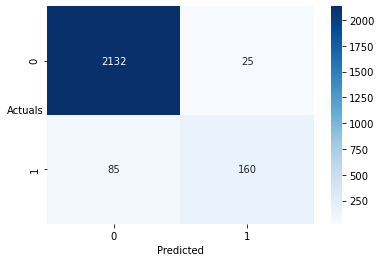

In [101]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [102]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))


              precision    recall  f1-score   support

         0.0      0.962     0.988     0.975      2157
         1.0      0.865     0.653     0.744       245

    accuracy                          0.954      2402
   macro avg      0.913     0.821     0.860      2402
weighted avg      0.952     0.954     0.951      2402



In [103]:
y_prob_pred_test = model_36.predict(Default_test)
y_prob_pred_test

3163   0.00
3133   0.00
937    0.11
196    0.98
2852   0.00
       ... 
2953   0.00
3116   0.00
1010   0.00
1292   0.00
2130   0.00
Length: 1184, dtype: float64

In [104]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

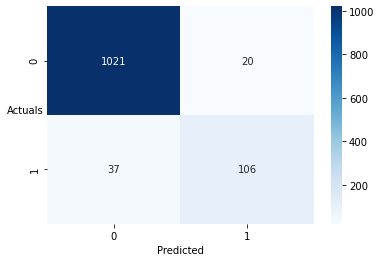

In [105]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [106]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.965     0.981     0.973      1041
         1.0      0.841     0.741     0.788       143

    accuracy                          0.952      1184
   macro avg      0.903     0.861     0.880      1184
weighted avg      0.950     0.952     0.951      1184



In [107]:
y_prob_pred_4 = model_36.predict()

Overall 95.2% of correct predictions to total predictions were made by the model

74.1% of those defaulted were correctly identified as defaulters by the model

#### Choosing the optimal threshold

In [108]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)

In [109]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2161684339100285

#### Validating on the train set with revised threshold

In [110]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.2161684339100285:
        a=1
    else:
        a=0
    y_class_pred.append(a)

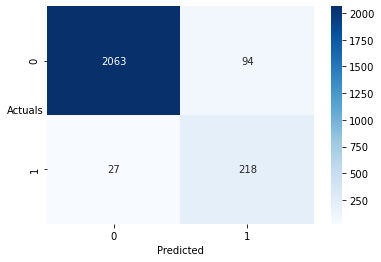

In [111]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [112]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))


              precision    recall  f1-score   support

         0.0      0.987     0.956     0.972      2157
         1.0      0.699     0.890     0.783       245

    accuracy                          0.950      2402
   macro avg      0.843     0.923     0.877      2402
weighted avg      0.958     0.950     0.952      2402



#### Validating on Test set

In [113]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.21616843391002855:
        a=1
    else:
        a=0
    y_class_pred.append(a)

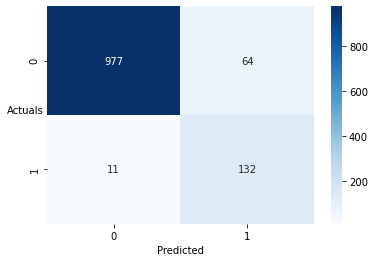

In [114]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [115]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.989     0.939     0.963      1041
         1.0      0.673     0.923     0.779       143

    accuracy                          0.937      1184
   macro avg      0.831     0.931     0.871      1184
weighted avg      0.951     0.937     0.941      1184



In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [117]:
LDA = LinearDiscriminantAnalysis()

In [118]:
lda_model = LDA.fit(X_train, y_train)

In [119]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [120]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2157
         1.0       0.79      0.48      0.59       245

    accuracy                           0.93      2402
   macro avg       0.86      0.73      0.78      2402
weighted avg       0.93      0.93      0.93      2402



In [121]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1041
         1.0       0.83      0.43      0.57       143

    accuracy                           0.92      1184
   macro avg       0.88      0.71      0.76      1184
weighted avg       0.91      0.92      0.91      1184



In [122]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [123]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [124]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.05596896613528377

In [125]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.05596896613528377:
        a=1
    else:
        a=0
    y_class_pred.append(a)

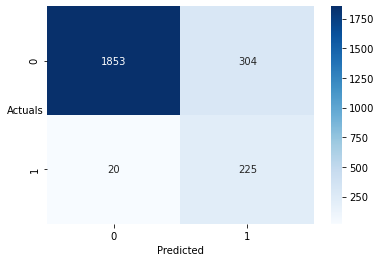

In [126]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [127]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.989     0.859     0.920      2157
         1.0      0.425     0.918     0.581       245

    accuracy                          0.865      2402
   macro avg      0.707     0.889     0.750      2402
weighted avg      0.932     0.865     0.885      2402



In [128]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.05596896613528377:
        a=1
    else:
        a=0
    y_class_pred.append(a)

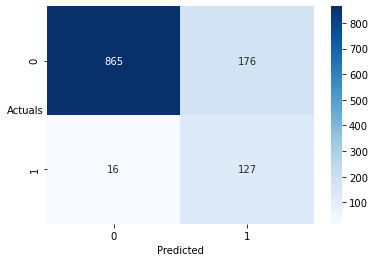

In [129]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [130]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.982     0.831     0.900      1041
         1.0      0.419     0.888     0.570       143

    accuracy                          0.838      1184
   macro avg      0.700     0.860     0.735      1184
weighted avg      0.914     0.838     0.860      1184



In [131]:
#Random Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [133]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [134]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 30,
 'n_estimators': 50}

In [135]:
best_grid = grid_search.best_estimator_

In [136]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [137]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2157
         1.0       0.97      0.92      0.94       245

    accuracy                           0.99      2402
   macro avg       0.98      0.96      0.97      2402
weighted avg       0.99      0.99      0.99      2402



In [138]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1041
         1.0       0.97      0.94      0.95       143

    accuracy                           0.99      1184
   macro avg       0.98      0.97      0.97      1184
weighted avg       0.99      0.99      0.99      1184



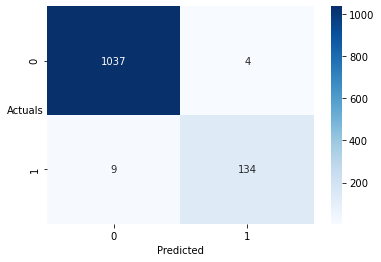

In [139]:
sns.heatmap((metrics.confusion_matrix(y_test, pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);